# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Задача определить рыночную стоимость объектов недвижимости. Установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

В процессе:
- ознакомимся с данными
- выполним предобработку (обработаем пропуски и проверим на возможные ошибки)
- проведём исследовательский анализ данных (по каждой из характеристик квартир)
- проверим, как быстро продавались квартиры.
- посмотрим на зависимость стоимости от общей площади, жилой площади, площади кухни, количества комнат, типа этажа и прочих факторов.
- вычислим топ-10 населённых пунктов по цене за кв. метр
- посмотрим на цены на квартиры непосредственно в черте Санкт-Петербурга
- сделаем выводы.

## Знакомство с данными. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('C:\\Users\\Marat\\Documents\\Marat\\data_analyse\\projects\\analysis_estate\\real_estate_data.csv', sep='\t')

display(data.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
# общая информация по датафрейму
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

### Кратко о датасете:
- В исходном датафрейме имеется 23698 строк (они же объявления о продаже). Из них однозначно 20518 уже были сняты (т.е. проданы или квартиры отказались продавать)
- очень много строк, где имеются пропуски. Особенно стоит обратить внимание на:
* `ceiling_height` - высота потолков
* `floors_total` - количество этажей
* `living_area` - жилая площадь
* `is_apartment` - апартаменты
* `kitchen_area` -площадь кухни
* `balcony` - количество балконов
* `locality_name` - населенный пункт
* `airports_nearest` - расстояние до ближайшего аэропорта
* `cityCenters_nearest` - расстояние до центра города
* `parks_around3000` - количество парков в 3км зоне
* `parks_nearest` - расстояние до ближайшего парка
* `ponds_around3000` - наличие водоёмов в 3км зоне
* `ponds_nearest` - расстояние до ближайшего водоёма
Как минимум, по этим столбцам стоит посмотреть возможность обработать пропуски

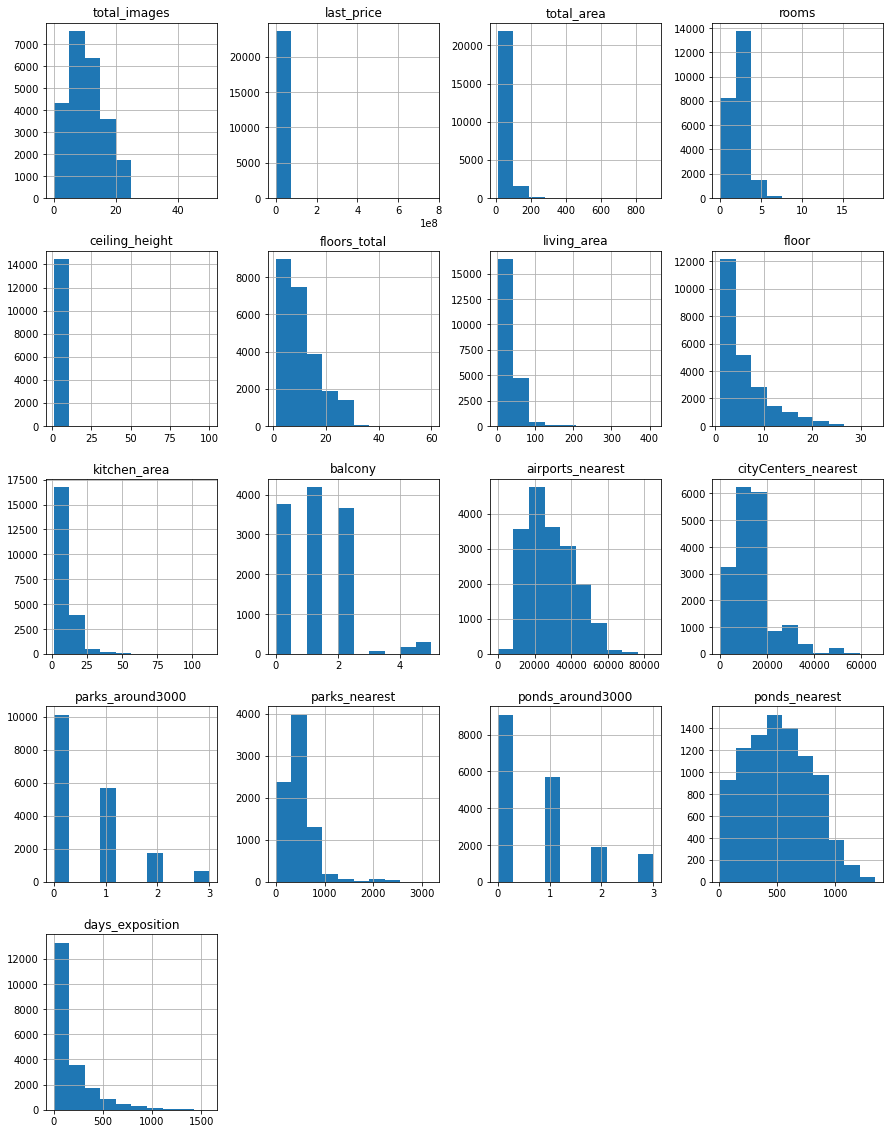

In [4]:
data.hist(figsize=(15, 20))
plt.show()

### Гистограммы по каждому столбцу
- площадь у большинства до 100м2 (необходимо будет проверить минимальные значения), совсем немного от 100 до 200 и очень мало свыше 200 (необходимо проверить точнее)
- количество комнат большинство  3-4, также есть много однокомнатных и двухкомнатных квартир. По диаграмме также видно, что могут быть квартиры, где нет комнат - проверить
- высота потолка - явно есть аномальные значения ("хвоста" гистограммы не видно).
- Большинство домов имеют этажность 20 - нужно рассмотреть подробнее
- жилая площадь - основной объём объявлений охватывает квартиры с жилой площадью до 50м2
- площадь кухонь в большинстве случаев укладывается в пределах 10-15м2
- Этажи: большинство ниже 5, основная часть объявлений - ниже 10
- Большинство расположены в пределах 15 до 40 км от аэропорта.
- Расстояние до центра - большинство в пределах 20 км
- У большинства квартир нет вблизи парков или есть 1 парк. У тех, что есть, парки в большинстве случаев находятся в пределах 500-600м
- У большинства квартир нет вблизи водоёмов или есть 1 водоём. У тех, что есть, водоёмы в большинстве случаев находятся в пределах 500-700м
- количество балконов в квартирах - от 0 до 2
- большинство объявления закрываются в первые 100 дней

### Предобработка данных

### Изменим тип данных в графе с датами

In [5]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S').round('1D')

### Столбец с количеством этажей.
Поскольку без доступа к дополнительной информации невозможно как-то примерно правильно исправить пропуски с количеством этажей `floors_total` в доме, то просто уберём их из датасета.

In [6]:
print(data['floors_total'].isna().sum())

86


Пропусков всего `86` - это очень мало по сравнению с исходным количеством

In [7]:
# обработать объявления с отсутствием информации о количестве этажей в доме
data = data.dropna(subset=['floors_total'])
# убраны

### Апартаменты:
Вероятнее всего, что там, где не указано, является ли объект продажи апартаментами или нет, логичнее всего предположить, что все эти объявления - не апартаменты (т.к. апартаменты это отдельный, специфический вид жилья)

In [8]:
data['is_apartment'] = data['is_apartment'].fillna(False)
print('количество апартаментов', data['is_apartment'].sum())
print('количество квартир', data['is_apartment'].count() - data['is_apartment'].sum())

количество апартаментов 50
количество квартир 23563


### Количество комнат.
У столбца "количество комнат"(`rooms`) нет пропусков. Но однозначно имеются объявления, где количество комнат - `о`. Проверим это:

In [9]:
# количество комнат
display(data.query('rooms == 0').head())
print('количество строк с количеством комнат - 0:', data.loc[data['rooms'] == 0, 'rooms'].count())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
144,1,2450000.0,27.00,2017-03-30,0,NaN,24.0,15.50,2,False,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0
349,4,2320000.0,25.00,2017-09-27,0,NaN,14.0,17.00,1,False,...,NaN,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0
440,8,2480000.0,27.11,2018-03-12,0,NaN,17.0,24.75,4,False,...,NaN,2.0,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0
508,0,3375000.0,34.40,2017-03-28,0,NaN,26.0,24.30,19,False,...,NaN,1.0,посёлок Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0
608,2,1850000.0,25.00,2019-02-20,0,NaN,10.0,NaN,7,False,...,NaN,NaN,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0


количество строк с количеством комнат - 0: 194


Такие квартиры имеются (`197` шт).  
Проверим, какая площадь у этих квартир:

In [10]:
print('средняя площадь у квартир с количеством комнат - 0:', data.loc[data['rooms'] == 0, 'total_area'].mean())

средняя площадь у квартир с количеством комнат - 0: 29.321701030927844


Вероятно, что там, где "0", там однокомнатные квартиры или студии-однушки. Приравняем к однокомнатным

In [11]:
data['rooms'] = data['rooms'].replace(0, 1)
print('количество строк с количеством комнат - 0:', data.loc[data['rooms'] == 0, 'rooms'].count())

количество строк с количеством комнат - 0: 0


### Балконы
Скорее всего, там, где нет информации о балконах, и самих балконов нет вообще.  Заменим пропуски на нули.

In [12]:
# избавимся от балконов - там , где NaN - нет балконов
data['balcony'] = data['balcony'].fillna(0)
data['balcony'] = data['balcony'].astype('int')

print(data['balcony'].isna().sum())

0


### Жилая площадь квартир.
Пропуски могли образоваться по недосмотру тех, кто размещал объявления (или ошибочно не были подгружены в датасет)  
Для начала, ещё раз посмотрим, как распределяются квартиры по общей площади.

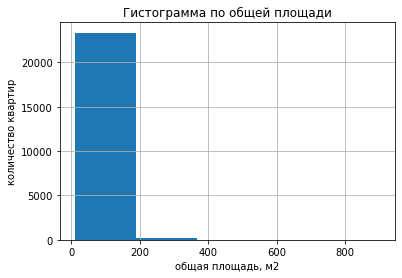

максимальная площадь квартир: 900.0
количество квартир с площадью боьше 400м2: 26


In [13]:
# как распределяется площадь квартир
data.hist('total_area', bins=5)
plt.title('Гистограмма по общей площади')
plt.xlabel('общая площадь, м2')
plt.ylabel('количество квартир')
plt.show()
print('максимальная площадь квартир:', data['total_area'].max())
print('количество квартир с площадью боьше 400м2:', data.loc[data['total_area'] >= 400, 'total_area'].count())

Разобьём на категории по общей площади:

In [14]:
def category_area(area):
    if area < 25:
        return 'a) до 25м2'
    if area < 50:
        return 'b) от 25 до 50м2'
    if area < 90:
        return 'c) от 50 до 90м2'
    if area < 120:
        return 'd) от 90 до 120м2'
    if area < 150:
        return 'e) от 120 до 150м2'
    if area < 200:
        return 'f) от 150 до 200м2'  
    if area < 400:
        return 'g) от 200 до 400м2'
    return 'h) от 400м2'

data['category_area'] = data['total_area'].apply(category_area)

Пропуски можно заполнить по среднему % жилой площади от общей площади (общая площадь есть у всех объявлений) по каждой категории.  
Поэтому добавим столбец с долей жилой площади от общей площади (сразу на будущее сделаем то же самое и для кухонь).  
А после можно посмотреть по сводной таблице (сгруппировав по категории площади) средний (или лучше медианный) процент для каждой категории.

In [15]:
# добавим столбцы с % жилой площади и кухни
def share_living_area(row):
    return row['living_area'] / row['total_area']

data['share_living_area'] = data.apply(share_living_area, axis=1)

def share_kitchen_area(row):
    return row['kitchen_area'] / row['total_area']

data['share_kitchen_area'] = data.apply(share_kitchen_area, axis=1)

In [16]:
data_by_area = data.pivot_table(index='category_area', values=['share_living_area'], aggfunc= ['median', 'min', 'count'])
display(data_by_area)


,median,min,count
,share_living_area,share_living_area,share_living_area
category_area,,,
a) до 25м2,0.700046,0.086957,159
b) от 25 до 50м2,0.522078,0.073171,9897
c) от 50 до 90м2,0.594595,0.038462,9228
d) от 90 до 120м2,0.582566,0.141304,1482
e) от 120 до 150м2,0.586548,0.021583,466
f) от 150 до 200м2,0.597129,0.226316,310
g) от 200 до 400м2,0.627317,0.255814,182
h) от 400м2,0.558045,0.179444,19


Заполним пропуски по медианной доле жилой площади от жилой по каждой категории. Кроме того, могут быть объявления где, жилая площадь указана больше общей - тоже исправить аналогичным образом

In [17]:
# посмотрим количесвто остутствующих значений по графе жилая площадь
print(data['living_area'].isna().sum())

# отсуттвующие значения по медиане % по каждой категории по площади
# остутвующих 1903шт
print(data.loc[(data['living_area'] >= data['total_area']), 'living_area'].count())
# (имеются 2 штуки, где жилая плошщадь больше общей - ошибка)

for area in data['category_area'].unique():
    data.loc[(data['category_area'] == area) & (data['living_area'].isna()) | \
             (data['living_area'] >= data['total_area']), 'living_area'] = \
    (data.loc[(data['category_area'] == area), 'share_living_area'].median() * data['total_area'])

print(data['living_area'].isna().sum())
print(data.loc[(data['living_area'] >= data['total_area']), 'living_area'].count())

1870
2
0
0


### Площадь кухонь
аналогичным способом обработаем площадь кухонь:

In [18]:
data_by_kitchen = data.pivot_table(index='category_area', values=['share_kitchen_area'], aggfunc= ['mean', 'median', 'min', 'count'])
display(data_by_kitchen)

,mean,median,min,count
,share_kitchen_area,share_kitchen_area,share_kitchen_area,share_kitchen_area
category_area,,,,
a) до 25м2,0.242333,0.217391,0.083333,39
b) от 25 до 50м2,0.220339,0.220513,0.045614,9651
c) от 50 до 90м2,0.162125,0.152174,0.043524,9225
d) от 90 до 120м2,0.160351,0.142857,0.054348,1475
e) от 120 до 150м2,0.150624,0.128033,0.054362,480
f) от 150 до 200м2,0.137263,0.112527,0.025381,312
g) от 200 до 400м2,0.113622,0.103318,0.029240,179
h) от 400м2,0.087199,0.089744,0.030894,21


In [19]:
# посмотрим количество отсутствующих значений по графе площадь кухни и заменим по медианному % по каждой категории
print(data['kitchen_area'].isna().sum())
# отсутствующие значения по медиане % по каждой категории по площади
# остывающих 2278шт
for area in data['category_area'].unique():
    data.loc[(data['category_area'] == area) & (data['kitchen_area'].isna()), 'kitchen_area'] = \
    (data.loc[(data['category_area'] == area), 'share_kitchen_area'].median() * data['total_area'])
print(data['kitchen_area'].isna().sum())


2231
0


### Разберёмся с наименованием населённых пунктов
Предлагаем пройтись по всем уникальным наименованиям и оставить только сами наименования без привязки к типу населённого пункта (это можно сделать т.к. все населённые пункты начинаются с заглавной буквы). Соответственно в самом датасете заметить на простые наименования.

In [20]:
# список нас. пунктов без пропусков
locations = data['locality_name'].dropna().unique()

# сделаем словарь, где ключу (старому наименованию) будет соответствовать только само название без типа населённого пункта
dict_of_locations = {}
for loc in locations:
    location_list = loc.split()
    location = []
    for i in range(len(location_list)):
        if location_list[i][0].isupper() == True:
            location.append(location_list[i])
    dict_of_locations[loc] = ' '.join(location)

# функция, которая заменит все старые наименования по словарю и при этом оставит NaN
def simple_name_location(name):
    if pd.isna(name) == False:
        return dict_of_locations[name]
    return float('nan')
        
data['locality_name'] = data['locality_name'].apply(simple_name_location)

Оставшиеся пустые строки (т.е неизвестные нас. пункты):

In [21]:
# оставшиеся пустые строки (неизвестные населённые пункты):
data['locality_name'].isna().sum()

48

Поскольку без доступа к дополнительным данным исправить пропуски невозможно - просто уберём их (их немного - всего 49)  
Сложим всё в новый датафрейм

In [22]:
# избавимся от пустых строк (неизвестных населённых пунктов - в новый датафрейм)
new_data = data.dropna(subset=['locality_name']).copy()
new_data['locality_name'].isna().sum()

0

### Обработаем расстояние до центра города
Это можно сделать частично - там, где в одном и том же населённом пункте несколько объявлений, пустые можно заполнить по среднему расстоянию, для этого населённого пункта

In [23]:
# обработаем пустые значения в расстоянии до центра города (через среднее по населённому пункту), где это возможно
print('количество строк с неуказанным расстоянием до центра города до обработки:', new_data['cityCenters_nearest'].isna().sum())

for loc in new_data['locality_name'].unique():
    new_data.loc[(new_data['locality_name'] == loc) & (new_data['cityCenters_nearest'].isna()), 'cityCenters_nearest'] = \
    new_data.loc[(new_data['locality_name'] == loc), 'cityCenters_nearest'].mean()

print('количество строк с неуказанным расстоянием до центра города после обработки:', new_data['cityCenters_nearest'].isna().sum())

# остаётся ещё довольно много пустых строк, которые не обработать без более точной информации по населенным пунктам

количество строк с неуказанным расстоянием до центра города до обработки: 5501
количество строк с неуказанным расстоянием до центра города после обработки: 5432


Обработать удалось не все пропуски, а оставшихся отсутствующих ещё много.  Но самостоятельно обработать их невозможно без доступа к дополнительным данным.
Стоит обратить внимание ответственных за сбор информации на недостающие данные, т.к. такая информация как расстояние должна формироваться автоматически, а не от авторов объявлений.

### Расстояние до аэропорта:
Аналогичным образом обработаем расстояние до аэропорта.  
Кроме того, будем учитывать, что нельзя строить жилые дома в радиусе 4 км (это предварительная информация - стоит проверить)

In [24]:
# нельзя строить жилые дома в радиусе 4км.
print('расстояние меньше 4км:', new_data.loc[new_data['airports_nearest'] < 4, 'airports_nearest'].count())
new_data = new_data.loc[(new_data['airports_nearest'] >= 4) | (new_data['airports_nearest'].isna())]

print('количество строк с неуказанным расстоянием до аэропорта до обработки:', new_data['airports_nearest'].isna().sum())

for loc in new_data['locality_name'].unique():
    new_data.loc[(new_data['locality_name'] == loc) & (new_data['airports_nearest'].isna()), 'airports_nearest'] = \
    new_data.loc[(new_data['locality_name'] == loc), 'airports_nearest'].mean()

print('количество строк с неуказанным расстоянием до аэропорта после обработки:', new_data['airports_nearest'].isna().sum())
# остаётся ещё довольно много пустых строк, которые не обработать без более точной информации по населенным пунткам


расстояние меньше 4км: 1
количество строк с неуказанным расстоянием до аэропорта до обработки: 5524
количество строк с неуказанным расстоянием до аэропорта после обработки: 5432


Также остаётся много пропусков, которые нельзя заполнить без доп. информации. Снова вопрос к системе, собирающей информацию.

### Высота потолков

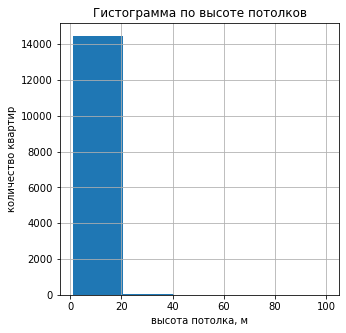

In [25]:
new_data.hist('ceiling_height', bins=5, figsize=(5, 5))
plt.title('Гистограмма по высоте потолков')
plt.xlabel('высота потолка, м')
plt.ylabel('количество квартир')
plt.show()

Имеются явно нереальные потолки (те, что больше 20м)

In [26]:
print('количество строк с высотой потолка более 20м:', new_data.loc[new_data['ceiling_height'] >= 20, 'ceiling_height'].count())
print('количество строк с высотой потолка до 20м:', new_data.loc[new_data['ceiling_height'] < 20, 'ceiling_height'].count())
print('количество отсутствующих значений:', new_data['ceiling_height'].isna().sum())

количество строк с высотой потолка более 20м: 23
количество строк с высотой потолка до 20м: 14457
количество отсутствующих значений: 9084


Вероятнее всего, те, что выше 20м получились из-за ошибки авторов (условно написали в 10 раз выше, не поставив запятую).
Исправим, разделив такие потолки на 10

In [27]:
# исправим те, что >= 20м (разделим на 10)
new_data['ceiling_height'] = new_data['ceiling_height'].where(new_data['ceiling_height'] < 20, (new_data['ceiling_height'] / 10))
print()
print('после обработки:')
print('количество строк с высотой потолка более 20м:', new_data.loc[new_data['ceiling_height'] >= 20, 'ceiling_height'].count())
print('количество строк с высотой потолка до 20м:', new_data.loc[new_data['ceiling_height'] < 20, 'ceiling_height'].count())



после обработки:
количество строк с высотой потолка более 20м: 0
количество строк с высотой потолка до 20м: 14480


Снова посмотрим, как распределяется высота потолков по квартирам

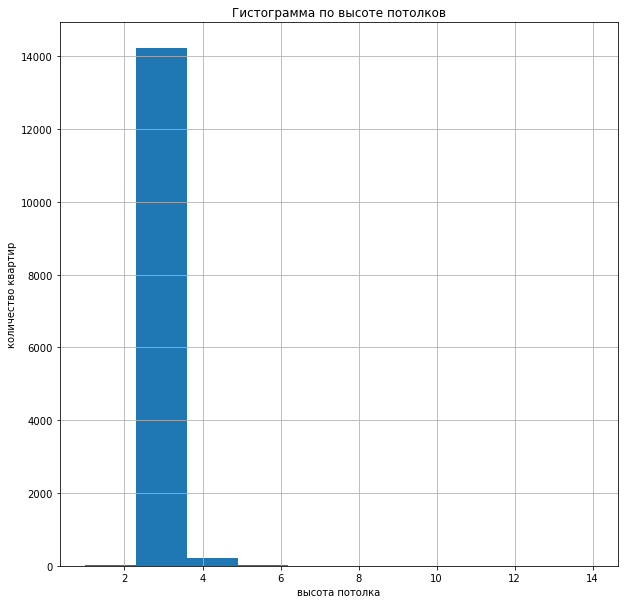

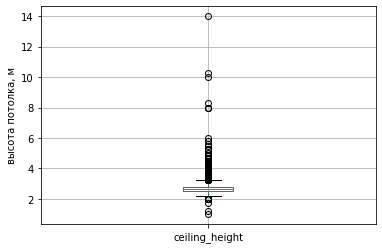

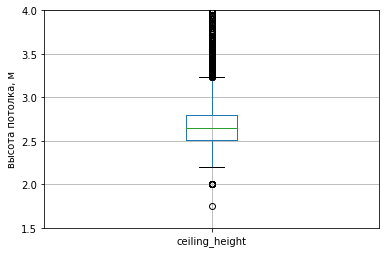

count    14480.000000
mean         2.729327
std          0.319790
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max         14.000000
Name: ceiling_height, dtype: float64

In [28]:
new_data.hist('ceiling_height', bins=10, figsize=(10, 10))
plt.title('Гистограмма по высоте потолков')
plt.xlabel('высота потолка')
plt.ylabel('количество квартир')
plt.show()

new_data.boxplot(column='ceiling_height')
plt.ylabel('высота потолка, м')
plt.show()

new_data.boxplot(column='ceiling_height')
plt.ylabel('высота потолка, м')
plt.ylim(1.5, 4)
plt.show()

new_data['ceiling_height'].describe()

По-прежнему есть совсем аномальные значения (например, меньше 2,2м и выше 6м) уберём их

In [29]:
# отделим совсем аномальные значения (меньше 2,2м и больше 6м)
normal_data = new_data.loc[(new_data['ceiling_height'] > 2.2) & (new_data['ceiling_height'] < 6) | \
                          (new_data['ceiling_height'].isna())].copy()

print('количество пустых строк в графе "высота потолков"', normal_data['ceiling_height'].isna().sum())


количество пустых строк в графе "высота потолков" 9084


Единственный более-менее безопасный вариант - заполнить по медиане. (но об этом стоит помнить)

In [30]:
# заполним по медиане
for area in normal_data['category_area'].unique():
    normal_data.loc[(normal_data['category_area'] == area) & (normal_data['ceiling_height'].isna()), 'ceiling_height'] = \
    normal_data.loc[(normal_data['category_area'] == area), 'ceiling_height'].median()

In [31]:
print(normal_data['ceiling_height'].isna().sum())
print(normal_data['ceiling_height'].count())

0
23540


### Парки и Водоёмы
Графы с парками и водоёмами обработать от пропусков не представляется возможным без дополнительный информации. Но их много, поэтому удалить нельзя.

### Итог предобработки

In [32]:
print('количество строк в обработанном датасете:', len(normal_data))

количество строк в обработанном датасете: 23540


In [33]:
normal_data.info()
normal_data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23540 entries, 0 to 23698
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23540 non-null  int64         
 1   last_price            23540 non-null  float64       
 2   total_area            23540 non-null  float64       
 3   first_day_exposition  23540 non-null  datetime64[ns]
 4   rooms                 23540 non-null  int64         
 5   ceiling_height        23540 non-null  float64       
 6   floors_total          23540 non-null  float64       
 7   living_area           23540 non-null  float64       
 8   floor                 23540 non-null  int64         
 9   is_apartment          23540 non-null  bool          
 10  studio                23540 non-null  bool          
 11  open_plan             23540 non-null  bool          
 12  kitchen_area          23540 non-null  float64       
 13  balcony         

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,category_area,share_living_area,share_kitchen_area
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.000000,8,False,...,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,d) от 90 до 120м2,0.472222,0.231481
1,7,3350000.0,40.4,2018-12-04,1,2.60,11.0,18.600000,1,False,...,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,b) от 25 до 50м2,0.460396,0.272277
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.300000,4,False,...,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,c) от 50 до 90м2,0.612500,0.148214
3,0,64900000.0,159.0,2015-07-24,3,3.08,14.0,94.943548,9,False,...,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,f) от 150 до 200м2,NaN,NaN
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.000000,13,False,...,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,d) от 90 до 120м2,0.320000,0.410000


- В исходном датасете имелось 23699 строк. После предобработки остаётся 23540 строк.
- Были изменены типы данных в столбцах `first_day_exposition` (на datetime), `balcony` (на int)
- обработаны пропуски (там,где это было возможно) в столбцах по столбцам `living_area` , `kitchen_area`, `ceiling_height`, `is_apartment`, `studio`, `balcony`, `locality_name`. Часть пропусков заполнялась по медианным или средним значениям.
- те пропуски, которые не поддавались обработки и их количество было незначительно по сравнению с общим количеством, были удалены.
- в некоторых столбцах (`airports_nearest`, `cityCenters_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest`) количество пропусков достаточно большое, но обработать их без дополнительной информации невозможно, поэтому были оставлены, как есть.
- пропуски в столбце `days_exposition` лишь отражают, что часть объявлений ещё не закрыто (скорее всего нет особого дополнительного смысла в его какой-то отдельной "очистке" от пропусков).


## Дополнительные столбцы

### Цена за квадратный метр

In [34]:
def price_m2(row):
    return round(row['last_price'] / row['total_area'])

normal_data['price_m2'] = normal_data.apply(price_m2, axis=1)
normal_data['price_m2'].head()

0    120370
1     82921
2     92786
3    408176
4    100000
Name: price_m2, dtype: int64

### День недели

In [35]:
normal_data['day_week'] = normal_data['first_day_exposition'].dt.weekday

### Месяц

In [36]:
normal_data['month'] = normal_data['first_day_exposition'].dt.month

### Год

In [37]:
normal_data['year'] = normal_data['first_day_exposition'].dt.year

### Тип этажа

In [38]:
# Добавим столбец "тип этажа"

def floor_type(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floors_total'] - row['floor'] == 0:
        return 'последний'
    return 'другой'

normal_data['floor_type'] = normal_data.apply(floor_type, axis=1)

In [39]:
#проверка
normal_data[['floor', 'floors_total', 'floor_type']].head(15)

,floor,floors_total,floor_type
0,8,16.0,другой
1,1,11.0,первый
2,4,5.0,другой
3,9,14.0,другой
4,13,14.0,другой
5,5,12.0,другой
6,6,26.0,другой
7,22,24.0,другой
8,26,27.0,другой
9,7,9.0,другой


### Расстояние до центра в км

In [40]:
# cтолбец расстояние до центра в км
normal_data['centers_nearest_km'] = round((normal_data['cityCenters_nearest'] / 1000))
normal_data[['cityCenters_nearest', 'centers_nearest_km']].head()

,cityCenters_nearest,centers_nearest_km
0,16028.0,16.0
1,18603.0,19.0
2,13933.0,14.0
3,6800.0,7.0
4,8098.0,8.0


Добавлен столбец с расстоянием до центра в км.

## Исследовательский анализ данных

### Общая площадь продаваемых квартир

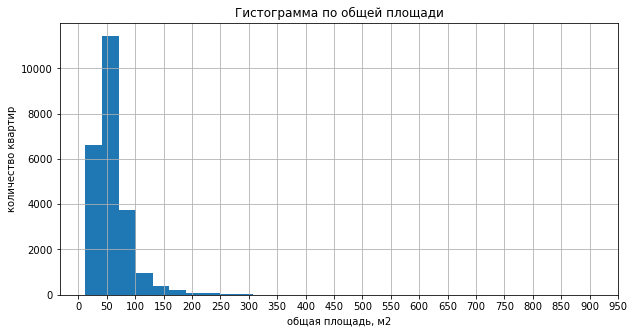

count    23540.000000
mean        60.331271
std         35.659381
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64


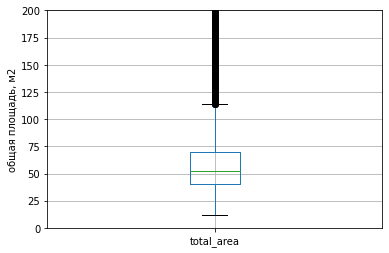

количество объявлений с площадью менее 15м2: 6


In [41]:
# изучим данные по общей площади продаваемых квартир

def ticks(mn, mx, step=1):
    line = []
    for num in range(mn, mx, step):
        line.append(num)
    return line
        

normal_data.hist('total_area', bins=30, figsize=(10, 5))
plt.title('Гистограмма по общей площади')
plt.xlabel('общая площадь, м2')
plt.ylabel('количество квартир')
plt.xticks(ticks(0, 1000, 50))
plt.show()

print(normal_data['total_area'].describe())

normal_data.boxplot(column='total_area')
plt.ylabel('общая площадь, м2')
plt.ylim(0, 200)
plt.show()

print('количество объявлений с площадью менее 15м2:', normal_data.loc[normal_data['total_area'] < 15, 'total_area'].count())

На гистограмме и диаграмме размаха видно, что наибольшее количество объявлений охватывает квартиры с площадью от 40м2 и почти до 70м2.  
При этом в относительно "нормальные" (в пределах "усов") значения попадают квартиры и от 12м2 и до 120м2 (стоит отметить, что общее количество объявлений с площадью менее 15м2 всего 6шт).  
В то же время по гистограмме достаточно заметное число объявлений формируют выбросы - от 120м2 и вплоть до 200м2, а свыше объявления 200м2 еще реже.  
Медиана - 52м2  
Также нельзя не отметить, что в целом разбором значений достаточно велик: максимальная площадь продаваемой квартиры - аж 900м2 (это может быть как ошибка в объявлении, так и некое "элитное жильё).  
Таким образом основное внимание стоит сосредоточить на квартирах площадью от 12м2 до 120м2

### Жилая площадь продаваемых квартир

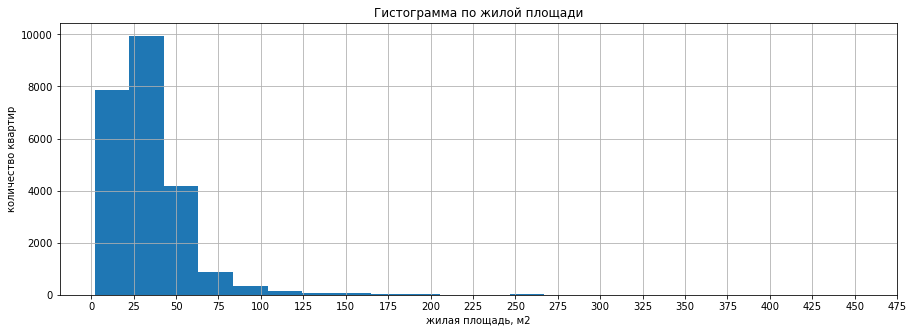

count    23540.000000
mean        34.611407
std         22.513770
min          2.000000
25%         18.900000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64


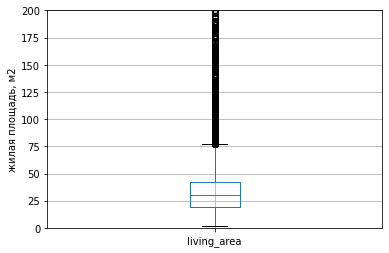

количество объявлений с жилой площадью менее 8м2: 8


In [42]:
# изучим данные по жилой площади продаваемых квартир

normal_data.hist('living_area', bins=20, figsize=(15, 5))
plt.title('Гистограмма по жилой площади')
plt.xlabel('жилая площадь, м2')
plt.ylabel('количество квартир')
plt.xticks(ticks(0, 500, 25))
plt.show()

print(normal_data['living_area'].describe())

normal_data.boxplot(column='living_area')
plt.ylim(0, 200)
plt.ylabel('жилая площадь, м2')
plt.show()

print('количество объявлений с жилой площадью менее 8м2:', normal_data.loc[normal_data['living_area'] < 8, 'living_area'].count())

По гистограмме видно, что наибольшее количество объявлений имеет жилую площадь от 18,9м2 до 45м2, плюс солидное количество ещё до 80м2.  
При этом "нижняя" граница прижимается к нулю.  
Примерно тоже самое выпадает и на диаграмме размаха - пределы "нормальных" значений начинаются от 2м2 (стоит учитывать, что часть пропусков заполнялась по медианной доле жилой от общей площади, из-за чего в некоторых случаях могли получится настолько маленькие значения) и заканчиваются на отметке 77м2. Основной объём объявлений приходится на объявления от 20м2 и до 45м2. 
При этом объявлений по квартирам с жилой площадью менее 8м2 (из расчёта по медианной доле жилой площади от общей в данной категории жилья до 25м2 - 70% при минимальной общей площади в 12м2) выходит всего 8 шт.
Достаточно заметные выбросы приходятся на объявления от 75м2 и до 160-175м2, при этом есть и более редкие значения свыше 160-175м2.  
Медиана - 30м2.  
Разброс достаточно большой (максимальное значение - 409,7м2)
Основной упор стоит делать на выборку 2-77м2

### Площадь кухонь

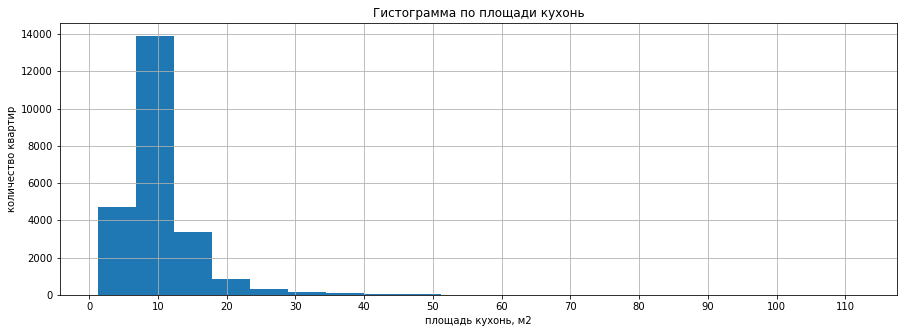

count    23540.000000
mean        10.460865
std          5.750311
min          1.300000
25%          7.000000
50%          9.100000
75%         11.800000
max        112.000000
Name: kitchen_area, dtype: float64


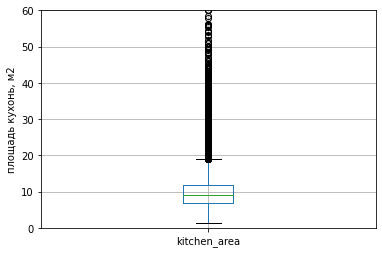

количество объявлений с площадью кухни менее 3м2: 16


In [43]:
normal_data.hist('kitchen_area', bins=20, figsize=(15, 5))
plt.xticks(ticks(0, 120, 10))
plt.title('Гистограмма по площади кухонь')
plt.xlabel('площадь кухонь, м2')
plt.ylabel('количество квартир')
plt.show()

print(normal_data['kitchen_area'].describe())

normal_data.boxplot(column='kitchen_area')
plt.ylabel('площадь кухонь, м2')
plt.ylim(0, 60)
plt.show()

print('количество объявлений с площадью кухни менее 3м2:', normal_data.loc[normal_data['kitchen_area'] < 3, 'kitchen_area'].count())

Согласно гистограмме и диаграмме размаха можно сделать вывод, что основное количество объявлений приходится на объявления с площадью кухни от 7м2 до 12м2. Кроме того, в относительно "нормальные" значения выборки попадают объявления с площадью от 1,5м2 до 19м2. Снова стоит помнить, часть пропусков заполнялась по средней доле площади кухни от общей площади, из-за чего в некоторых случаях могли получится настолько маленькие значения.  
Стоит помнить, что довольно солидный объём попадет и в диапазон от 19м2 до 22м2. (выше уже совсем редкие значения).
Разброс достаточно большой (максимальной значение 112м2)  
Медиана - 9,1м2.  
При этом количество объявлений с площадью кухонь менее 3м2 - всего 16 (опять же, если брать медианную долю кухонь примерно 21,7% в группе с площадью менее 25м2 от наименьшей по площади квартиры в 12м2)
Основной упор лучше делать на выборку от 1,5м2 (или лучше 3м2) до 19-22м2.

### Цена объекта за м2

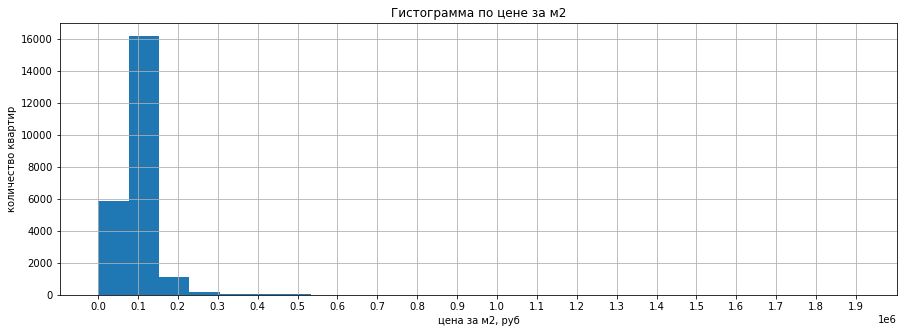

count    2.354000e+04
mean     9.937851e+04
std      5.017146e+04
min      1.120000e+02
25%      7.660625e+04
50%      9.500000e+04
75%      1.142170e+05
max      1.907500e+06
Name: price_m2, dtype: float64


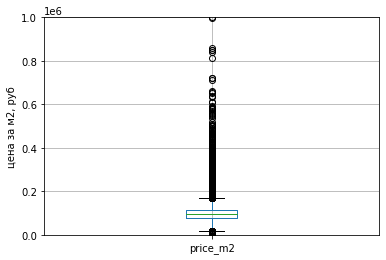

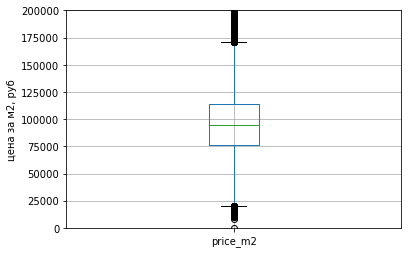

количество объявлений с ценой за м2 до 24т.р: 254


In [44]:
normal_data.hist('price_m2', bins=25, figsize=(15, 5))
plt.xticks(ticks(0, 2000000, 100000))
plt.title('Гистограмма по цене за м2')
plt.xlabel('цена за м2, руб')
plt.ylabel('количество квартир')
plt.show()

print(normal_data['price_m2'].describe())

normal_data.boxplot(column='price_m2')
plt.ylabel('цена за м2, руб')
plt.ylim(0, 1000000)
plt.show()

normal_data.boxplot(column='price_m2')
plt.ylabel('цена за м2, руб')
plt.ylim(0, 200000)
plt.show()

print('количество объявлений с ценой за м2 до 24т.р:', normal_data.loc[normal_data['price_m2'] < 24000, 'price_m2'].count())

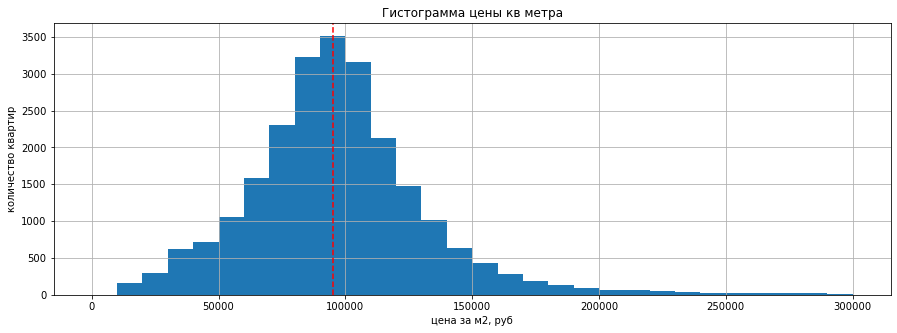

In [45]:
normal_data['price_m2'].hist(bins = 30, figsize=(15, 5), range = (0, 300000))\
    .axvline(x = normal_data['price_m2'].median(), color = 'red', linestyle = 'dashed')
plt.title('Гистограмма цены кв метра')
plt.xlabel('цена за м2, руб')
plt.ylabel('количество квартир')
plt.show()

На первый взгляд, по гистограмме по цене за квадратный метр может показаться, что нижняя граница практически вплотную прижимается к 0, а большая часть объявлений сосредоточена в диапазоне до 200тыс.руб за м2.
При более подробном рассмотрении можно увидеть, что основной блок цен за м2 в объявлениях сосредоточен в диапазоне от 75тыс. до 115тыс.руб. "Нормальные" значения датасете попадают в диапазон от 24т.р. до 174т.р.  
Минимум на отметке 112руб за м2 (очевидно "странная сумма"), а максимум - почти 2млн. за м2 (видимо, какое-то очень элитное жильё)  
Медиана - 95000руб/м2
Количество объявлений до 24т.р.  - "всего" 254 шт.
Основной упор стоит делать на диапазон от 24т.р и до 174 т.р. Но оценивать без привязки и группировки по другим показателям нельзя (например, без группировки по площади или количеству комнат)

### Количество комнат

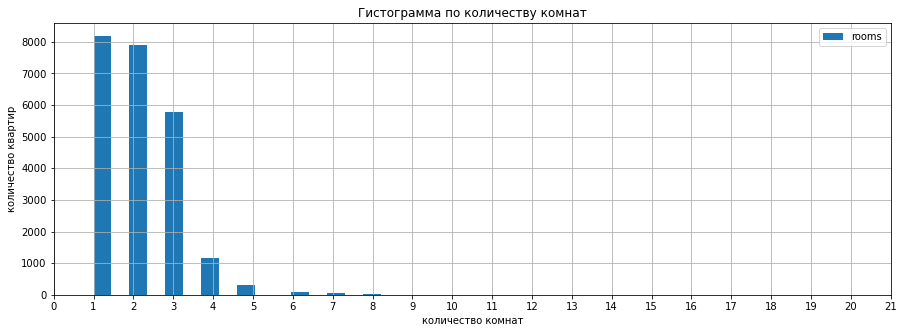

максимальное количество комнат: 19
минимальное количество комнат: 1


In [46]:
normal_data.plot(kind='hist', y='rooms', bins=40, figsize=(15, 5), grid=True)
plt.xticks(ticks(0, 22))
plt.title('Гистограмма по количеству комнат')
plt.xlabel('количество комнат')
plt.ylabel('количество квартир')
plt.show()

print('максимальное количество комнат:', normal_data['rooms'].max())
print('минимальное количество комнат:', normal_data['rooms'].min())


Основное количество объявлений сконцентрировано на однокомнатных и двухкомнатных квартирах (суммарно больше 16000 объявлений). Также довольно большой объём дают 3-х и 4-х -комнатные квартиры (примерно 5800 и 1100 объявлений). А вот, начиная с 5-коминатных квартир доля подобных объявлений довольно мала. Поэтому в первую очередь следует смотреть на 1-3 -комнатные квартиры и возможно 4х -комнатные.

### Высота потолков

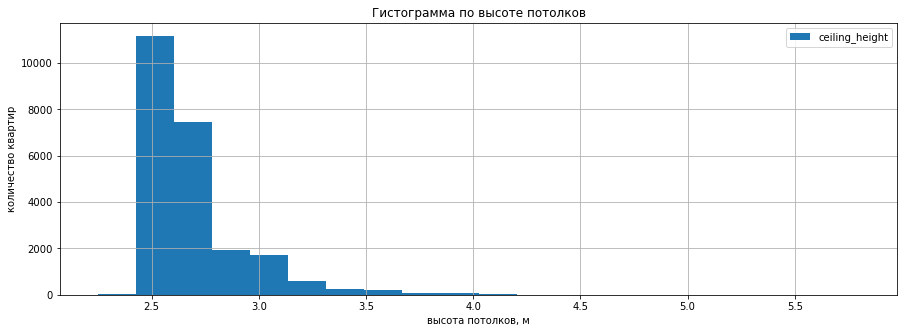

count    23540.000000
mean         2.698909
std          0.229678
min          2.250000
25%          2.600000
50%          2.650000
75%          2.750000
max          5.800000
Name: ceiling_height, dtype: float64


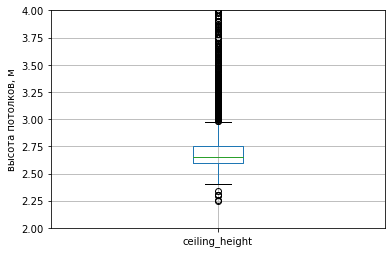

In [47]:
normal_data.plot(kind='hist', y='ceiling_height', bins=20, figsize=(15, 5), grid=True)
plt.title('Гистограмма по высоте потолков')
plt.xlabel('высота потолков, м')
plt.ylabel('количество квартир')
plt.show()

print(normal_data['ceiling_height'].describe())

normal_data.boxplot(column='ceiling_height')
plt.ylabel('высота потолков, м')
plt.ylim(2, 4)
plt.show()


Ключевые значения попадают в диапазон 2,6м и до 2,75м.  
Медиана - 2,65м
При этом в диапазон нормальных значений идут квартиры с потолками от примерно 2,35м до 2,9м.
Достаточно большое количество попадает также в диапазон до 3,2-3,35м. 
Выше уже слишком редки.  
Основное внимание на 2,35-2,9 (возможно до 3,5м)

### Этаж квартиры

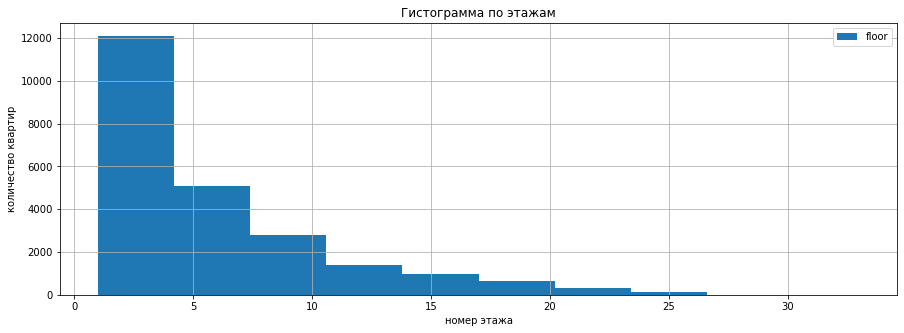

count    23540.000000
mean         5.878207
std          4.872109
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64


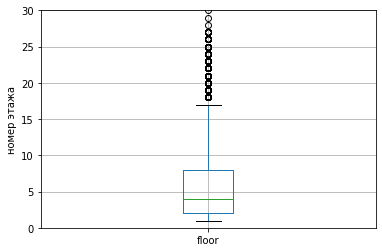

In [48]:
normal_data.plot(kind='hist', y='floor', bins=10, figsize=(15, 5), grid=True)
plt.title('Гистограмма по этажам')
plt.xlabel('номер этажа')
plt.ylabel('количество квартир')
plt.show()

print(normal_data['floor'].describe())

normal_data.boxplot(column='floor')
plt.ylabel('номер этажа')
plt.ylim(0, 30)
plt.show()

Больше всего объявлений касается квартир, располагающихся на 2 - 4 этажах.  
Основная группа включает в себя объявления по этажам с 2 по 7 этаж. При этом нормальные значения попадают в диапазон с 1-го этажа и до 17-го. Остальные более редкие (выбросы).  
Медиана - 4 этаж.  
Разброс существенный (имеются квартиры на 33-м этаже)

### Тип этажа

,quantity,share
floor_type,,
другой,17310,73.53%
первый,2905,12.34%
последний,3325,14.12%


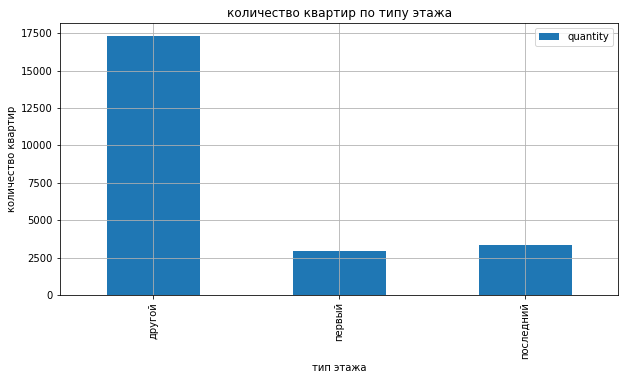

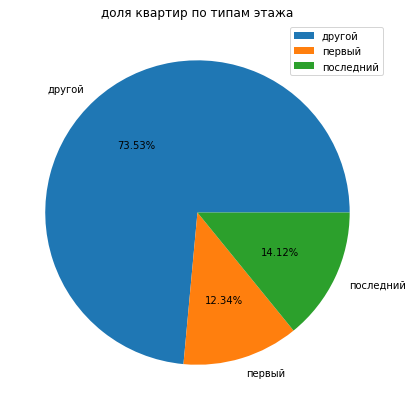

In [49]:
floor_type_data = normal_data.pivot_table(index='floor_type', values='floor', aggfunc='count')

floor_type_data.columns= ['quantity']
floor_type_data['share'] = floor_type_data['quantity'] / floor_type_data['quantity'].sum()
floor_type_data['share'] = floor_type_data['share'].apply(lambda x: "{0:.2f}%".format(100*x))
                                                          
display(floor_type_data)

floor_type_data.plot(kind='bar', y='quantity', figsize=(10, 5), grid=True)
plt.title('количество квартир по типу этажа')
plt.xlabel('тип этажа')
plt.ylabel('количество квартир')
plt.show()

floor_type_data.plot(kind='pie', y='quantity', figsize=(7, 7), autopct='%1.2f%%')
plt.title('доля квартир по типам этажа')
plt.ylabel('')
plt.show()

Основное количество объявлений приходится на квартиры с типом этажа из категории "другое" (т.е не первый и не последний этаж) - 73,54% всех объявлений.   
Квартиры на первых и последних этажах в выборке малочисленно, но всё-таки составляют существенный процент от общего количества (12,34% и 14,12%)


### Общее количество этажей в доме.

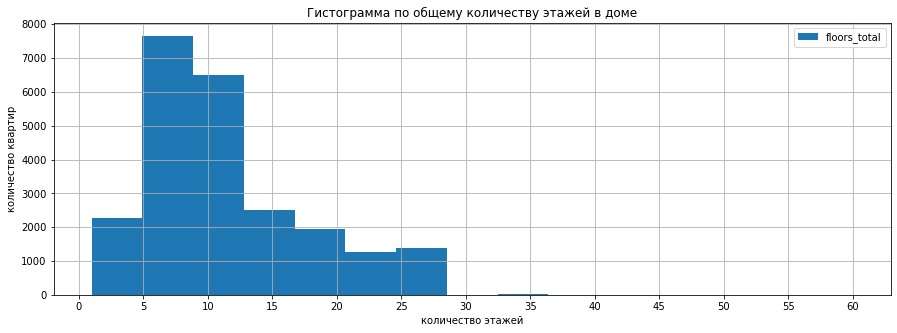

count    23540.000000
mean        10.676126
std          6.593663
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64


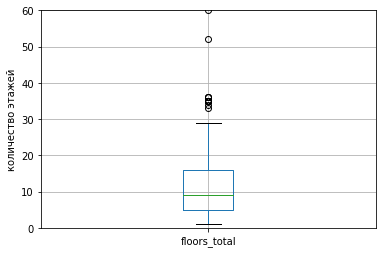

количество объявлений в домах выше 30 этажей: 31


In [50]:
normal_data.plot(kind='hist', y='floors_total', bins=15, figsize=(15, 5), grid=True)
plt.xticks(ticks(0, 65, 5))
plt.title('Гистограмма по общему количеству этажей в доме')
plt.xlabel('количество этажей')
plt.ylabel('количество квартир')
plt.show()

print(normal_data['floors_total'].describe())

normal_data.boxplot(column='floors_total')
plt.ylabel('количество этажей')
plt.ylim(0, 60)
plt.show()

print('количество объявлений в домах выше 30 этажей:', normal_data.loc[normal_data['floors_total'] >=30, 'floors_total'].count())

По гистограмме основная группа объявлений сосредоточена на домах с количеством этажей от 5 до 13. По диаграмме размаха этот диапазон расширяется - от 5 от 16 этажей.  
Нормальные значения попадают в диапазон с количеством этажей от 1-го по 29.  
Медиана - 9 этажей  
Все остальные совсем редкие - всего 31шт.

### Расстояние до центра города

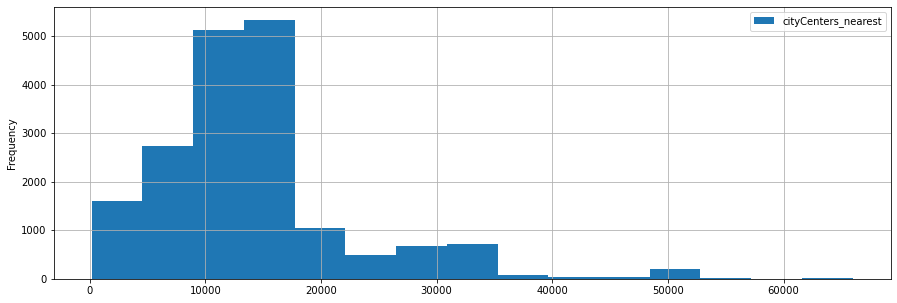

count    18119.000000
mean     14192.659315
std       8611.974043
min        181.000000
25%       9262.500000
50%      13073.000000
75%      16275.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64


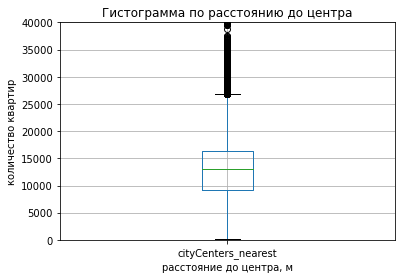

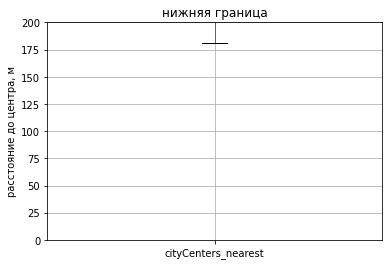

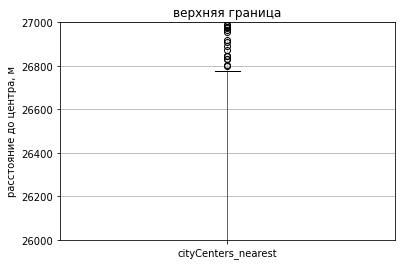

In [51]:
# Расстояние до центра города в метрах

normal_data.plot(kind='hist', y='cityCenters_nearest', bins=15, figsize=(15, 5), grid=True)
plt.show()

print(normal_data['cityCenters_nearest'].describe())

normal_data.boxplot(column='cityCenters_nearest')
plt.title('Гистограмма по расстоянию до центра')
plt.xlabel('расстояние до центра, м')
plt.ylabel('количество квартир')
plt.ylim(0, 40000)
plt.show()

# нижняя граница
normal_data.boxplot(column='cityCenters_nearest')
plt.title('нижняя граница')
plt.ylabel('расстояние до центра, м')
plt.ylim(0, 200)
plt.show()
# верхняя граница
normal_data.boxplot(column='cityCenters_nearest')
plt.title('верхняя граница')
plt.ylabel('расстояние до центра, м')
plt.ylim(26000, 27000)
plt.show()

Касательно расстояния до центра города:
 - разброс очень большой: минимально - 181м, максимально - почти 66км
 - основная группа укладывается в расстояние примерно от почти 9800м и до 17000м
 - нормальные значения - от 181м до 26700м
 - медиана - на расстоянии 13073м

### Расстояние до аэропорта

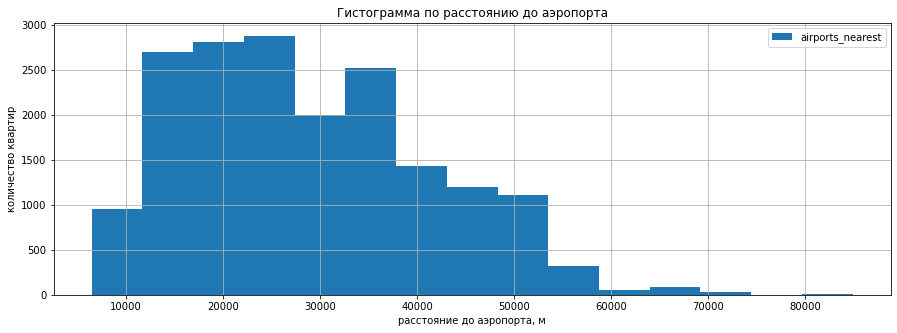

count    18119.000000
mean     28797.289962
std      12606.625325
min       6450.000000
25%      18590.500000
50%      26812.000000
75%      37227.000000
max      84869.000000
Name: airports_nearest, dtype: float64


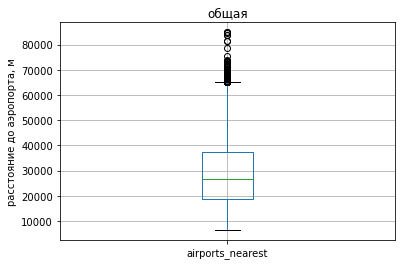

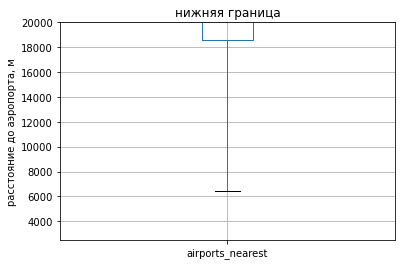

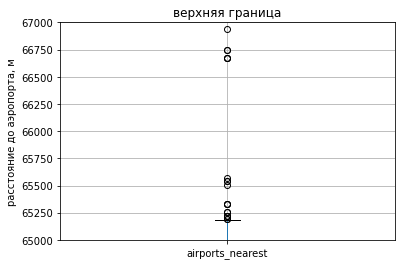

In [52]:
normal_data.plot(kind='hist', y='airports_nearest', bins=15, figsize=(15, 5), grid=True)
plt.title('Гистограмма по расстоянию до аэропорта')
plt.xlabel('расстояние до аэропорта, м')
plt.ylabel('количество квартир')
plt.show()

print(normal_data['airports_nearest'].describe())

normal_data.boxplot(column='airports_nearest')
plt.title('общая')
plt.ylabel('расстояние до аэропорта, м')
plt.show()

# Нижняя граница
normal_data.boxplot(column='airports_nearest')
plt.title('нижняя граница')
plt.ylabel('расстояние до аэропорта, м')
plt.ylim(2500, 20000)
plt.show()

# Верхняя граница
normal_data.boxplot(column='airports_nearest')
plt.title('верхняя граница')
plt.ylabel('расстояние до аэропорта, м')
plt.ylim(65000, 67000)
plt.show()

По расстоянию до аэропорта:
 - разброс значений большой: минимум на отметке 6450м, максимум - 84869м
 - концентрация значений достаточно неоднородна (есть "пики" в разных участках гистограммы)
 - наибольшая группа концентрируется в диапазоне от 18795м до 38786м
 - нормальные значения попадают в диапазон от 6200м до 65200м
 - медиана 26812м


### Расстояние до парка

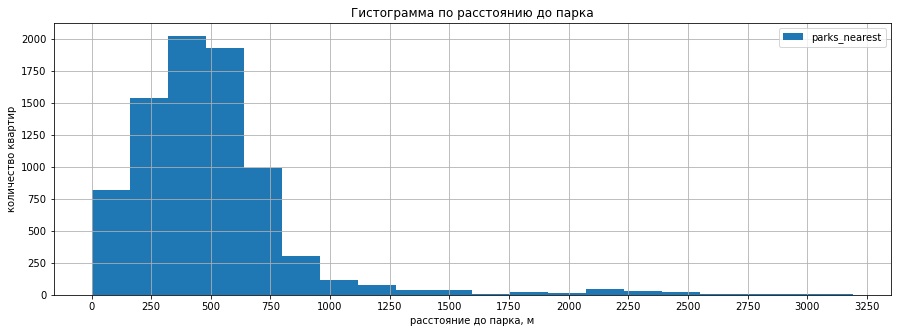

count    8022.000000
mean      490.543879
std       341.670081
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64


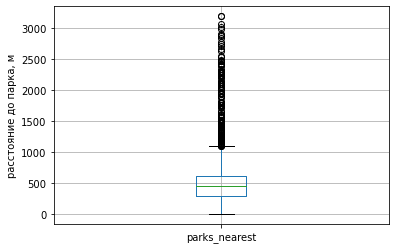

In [53]:
normal_data.plot(kind='hist', y='parks_nearest', bins=20, figsize=(15, 5), grid=True)
plt.title('Гистограмма по расстоянию до парка')
plt.xlabel('расстояние до парка, м')
plt.ylabel('количество квартир')
plt.xticks(ticks(0, 3500, 250))
plt.show()

print(normal_data['parks_nearest'].describe())

normal_data.boxplot(column='parks_nearest')
plt.ylabel('расстояние до парка, м')
plt.show()

Касательно расстояния до ближайшего парка:
 - наибольшая группа попадает в диапазон с расстоянием от 288 до 612м
 - нормальные значения в группе объявлений с расстоянием от 1м (видимо, на границе парка) до примерно 1100м
 - остальные объявления с большим расстоянием достаточно редкие. Но разброс достаточно сильный (почти до 3,2км)

### По дням публикации

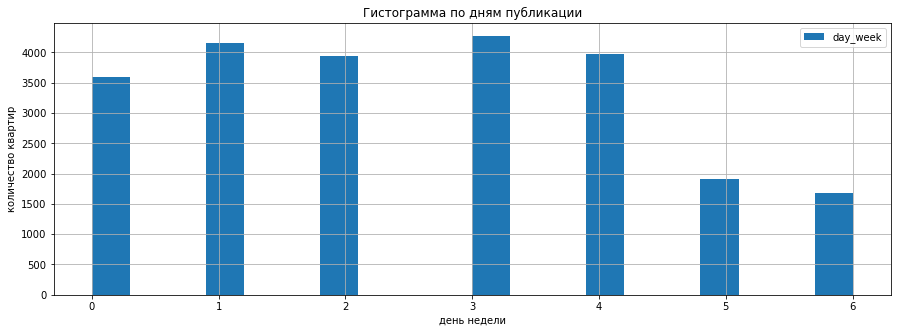

In [54]:
normal_data.plot(kind='hist', y='day_week', bins=20, figsize=(15, 5), grid=True)
plt.title('Гистограмма по дням публикации')
plt.xlabel('день недели')
plt.ylabel('количество квартир')
plt.show()

По гистограмме видно, что в будние дни объявления публикуют примерно с одинаковой частотой.
В выходные - почти в два раза реже.

### Месяц

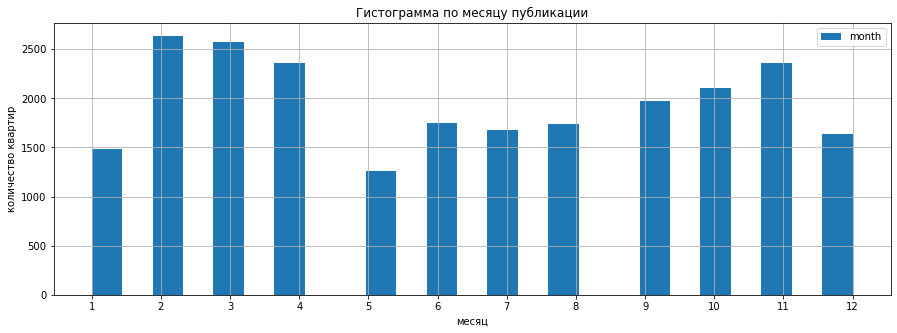

In [55]:
# по месяцам
normal_data.plot(kind='hist', y='month', bins=25, figsize=(15, 5), grid=True)
plt.title('Гистограмма по месяцу публикации')
plt.xlabel('месяц')
plt.ylabel('количество квартир')
plt.xticks(ticks(1, 13))
plt.show()

Наибольшее количество объявлений публикуется с февраля по апрель и с сентября по ноябрь.
Летом же количество объявлений проседает (возможная причина - период отпусков и дачный сезон)
Меньше всего объявлений публиковали в январе, мае и декабре - вероятно сказывается обилие праздничных или предпраздничных дней (в мае к тому же и начало дачного сезона).  

### Итого:
Наиболее типичная квартира на сайте с объявлениями о продаже недвижимости - это квартира:
- с примерной общей площадью 40-70м2,
- с жилой площадью 18-42,5м2, 
- с кухней 7-12м2,
- с количеством комнат от 1 до 3-х,
- с потолками 2,6-2,75м, 
- которая располагается со 2-го по 8 этаж,
- в домах высотой от 5 до 16 этажей,
- на расстоянии от центра города от 9,2км до 16,2км ,
- на расстоянии от аэропорта от 18,5км до 37,2км, 
- на расстоянии от парка 280-610м 
- со средней ценой за м2 76,6 тыс.руб до 114,5тыс.руб

### Как быстро продавались квартиры

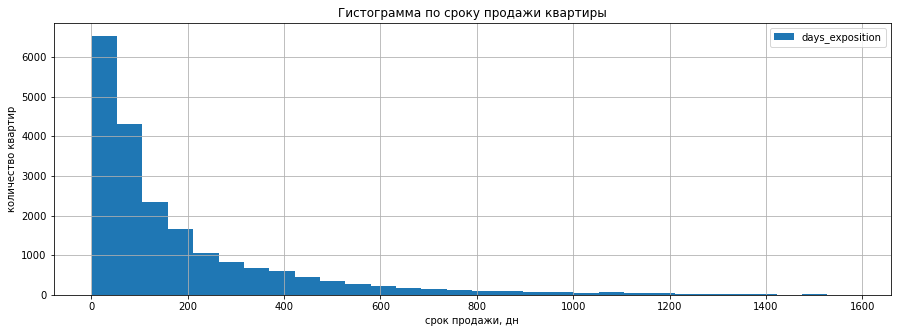

count    20373.000000
mean       180.775438
std        219.795192
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64


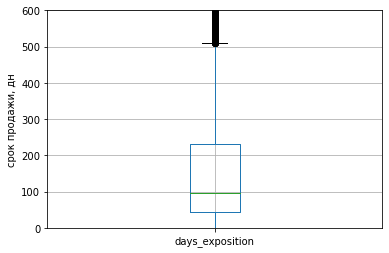

In [56]:
# сколько дней продавались квартиры

normal_data.plot(kind='hist', y='days_exposition', bins=30, figsize=(15, 5), grid=True)
plt.title('Гистограмма по сроку продажи квартиры')
plt.xlabel('срок продажи, дн')
plt.ylabel('количество квартир')
plt.show()

print(normal_data['days_exposition'].describe())

normal_data.boxplot(column='days_exposition')
plt.ylabel('срок продажи, дн')
plt.ylim(0, 600)
plt.show()


Явное распределение Пуассона:  
Количество объявлений уменьшается с увеличением срока их размещения.  
Минимально объявления были размещены в течение 1 дня. Максимум 1580дней.  
Средний срок размещения объявления - 181день. При этом медианное значение - 95дней  
Основное количество объявлений находится на сайте в период с 45 до 231 дня. (нормальные значения - от 1 до 510 дней)  
От 1 до 45 дней - достаточно быстрые продажи. От 231 до 510 дней - довольно долгие, но в пределах нормы. 
Свыше 510 дней - слишком долгие.

### Как факторы влияют на стоимость квартир

Для дальнейшего анализа соберём основной отфильтрованный датасет (с нормальными ценами за м2)  
К нему уже будем применять ещё фильтры в зависимости от выбранного параметра.
Назовём это простой фильтр.

In [57]:
filtred_data = normal_data.query('24000 <= price_m2 <= 174000')
len(filtred_data)

22436

Итого для дальнейшей фильтрации получается датасет с количеством объявлений 22436шт

Также для интереса соберём и "хорошую" подборку, куда попадают сразу все "нормальные" значения из всех ранее проанализированных параметров (но стоит учитывать, что в идеале перед отбором нормальных значений лучше было бы отобрать эти показатели последовательно, т.к. при исключении значений одних параметров могут смещаться значения других, но чтобы это сделать нужны веса для каждого параметра). Поэтому эта подборка - просто для наглядности

In [58]:
good_selection = normal_data.query('12 <= total_area <= 120 and \
                                  2 <= living_area <= 77 and \
                                  3 <= kitchen_area <= 22 and \
                                  24000<= price_m2 <= 174000 and \
                                  1 <= rooms <= 4 and \
                                  2.35 <= ceiling_height <= 2.9 and \
                                  1 <= floor <= 17 and \
                                  1 <= floors_total <= 29 and \
                                  181 <= cityCenters_nearest <= 26700 and \
                                  6200 <= airports_nearest <= 65200  and \
                                  1 <= parks_nearest <= 1100 and \
                                  1 <= days_exposition <= 510',  engine="python")
len(good_selection)

3874

В "хорошую" подборку попадает всего 3874 объявлений - слишком мало по сравнению с изначальным датасетом.

### Зависимость стоимости от общей площади
В простом фильтре добавляем ещё ограничение поплощади.

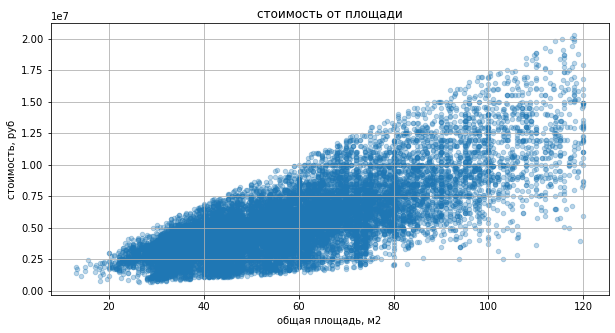

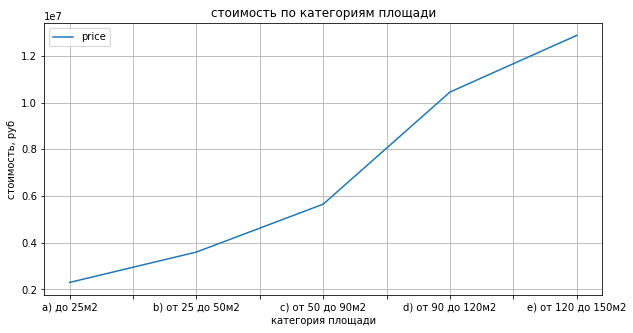

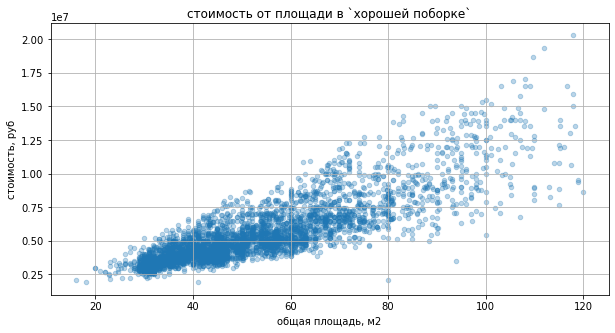

In [59]:
# отфильтруем по нормальной площади и нормальной цене за м2
filtred_area_data = filtred_data.query('12 <= total_area <= 120')
filtred_area_data.plot(x='total_area', y='last_price', kind='scatter', grid=True, figsize=(10, 5), 
                       alpha=0.3, title ='стоимость от площади')
plt.xlabel('общая площадь, м2')
plt.ylabel('стоимость, руб')
plt.show()

# группировка по категориям площади с медианной стоимостью в каждой группе
area_2 = filtred_area_data.pivot_table(index='category_area', values='last_price', aggfunc = ['median'])
area_2.columns = ['price']
area_2.plot(y='price', kind='line', grid=True, figsize=(10, 5), title ='стоимость по категориям площади')
plt.xlabel('категория площади')
plt.ylabel('стоимость, руб')
plt.show()

# график по "хорошей подборке"
good_selection.plot(x='total_area', y='last_price', kind='scatter', grid=True, figsize=(10, 5), 
                    alpha=0.3, title ='стоимость от площади в `хорошей поборке`')
plt.xlabel('общая площадь, м2')
plt.ylabel('стоимость, руб')
plt.show()


Если взять график рассеивания по просто отфильтрованным данным (по нормальным/показательным значениям площади и цены за м2), то можно видеть, что с увеличением площади стоимость однозначно растёт. Но в то же время с увеличением площади очень сильно увеличивается разброс значений. Это даёт основания полагать, что на стоимость могут сильно влиять другие факторы.  
Если сгруппировать по категориям площади квартир и вывести средние медианные значения для каждой группы, то результат получается ещё более однозначный - с ростом площади растёт стоимость квартиры.

Очень интересно, что график по "хорошей" подборке (отфильтрованной по всем возможным изученным параметрам) визуально выглядит очень похожим первый график (даже с более крутым уклоном наверх), хоть и более прореженным.

In [60]:
# Коэффициент корреляции Пирсона
print(filtred_area_data['total_area'].corr(filtred_area_data['last_price']))
print(good_selection['total_area'].corr(good_selection['last_price']))

0.7720523972038781
0.8383181189895441


Коэффициент Пирсона в отфильтрованной подборке (по площади и цене за м2) 0,772, т.е. достаточно серьёзная потенциальная прямая зависимость стоимости от общей площади квартиры.
В "хорошей" подборке данный коэффициент ещё выше - 0,838

### Жилая площадь
Аналогично для жилой площади.

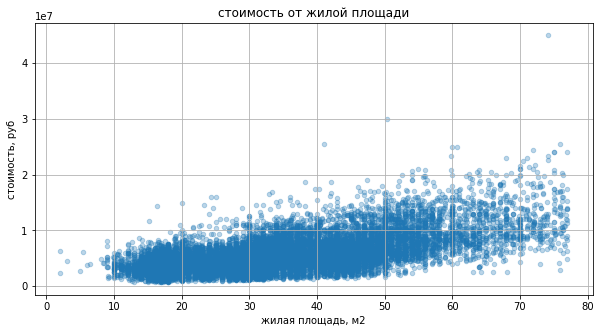

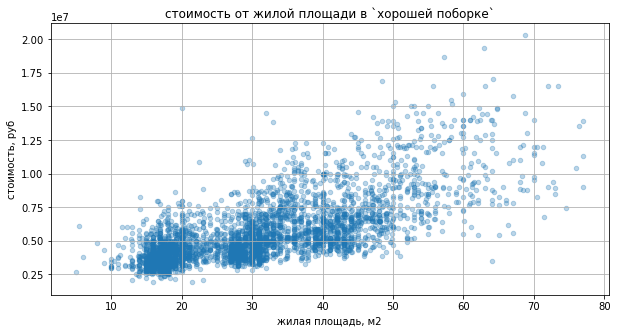

In [61]:
# отфильтруем по нормальной жилой площади
filtred_living_area = filtred_data.query('2 <= living_area <= 77')
filtred_living_area.plot(x='living_area', y='last_price', kind='scatter', grid=True, figsize=(10, 5),
                         alpha=0.3, title ='стоимость от жилой площади')
plt.xlabel('жилая площадь, м2')
plt.ylabel('стоимость, руб')
plt.show()

# график по "хорошей" подборке
good_selection.plot(x='living_area', y='last_price', kind='scatter', grid=True, figsize=(10, 5), 
                    alpha=0.3, title ='стоимость от жилой площади в `хорошей поборке`')
plt.xlabel('жилая площадь, м2')
plt.ylabel('стоимость, руб')
plt.show()

В отфильтрованной подборке стоимость растёт, но довольно медленно (наклон сравнительно небольшой). Разброс значений также увеличивается с ростом жилой площади, однако не настолько сильно, как в случае с общей площадью.  
В "хорошей" подборке наклон выражен сильнее, но и разброс тоже с ростом жилой площади увеличивается слишком сильно.

In [62]:
# Коэффициент корреляции Пирсона
print(filtred_living_area['living_area'].corr(filtred_living_area['last_price']))
print(good_selection['living_area'].corr(good_selection['last_price']))

0.6547049024613282
0.7096421422303161


Коэффициент корреляции по отфильтрованным данным (по жилой площади и по цене за м2) - 0,655 (ниже, чем по общей площади)
По хорошей подборке - 0,71 (также ниже, чем аналогичный по общей площади)  
Т.е. зависимость стоимости от жилой площади имеется, но слабее, чем от общей, но при этом достаточно значима.

### Площадь кухни

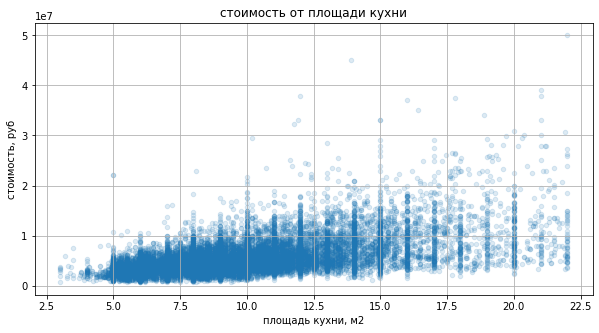

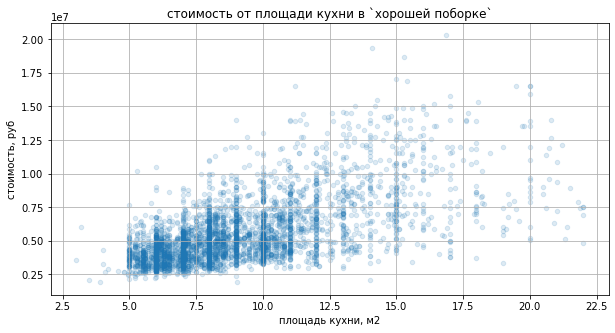

In [63]:
# отфильтруем по нормальной площади
filtred_kitchen_data = filtred_data.query('3 <= kitchen_area <= 22')
filtred_kitchen_data.plot(x='kitchen_area', y='last_price', kind='scatter', grid=True, figsize=(10, 5), 
                          alpha=0.15, title ='стоимость от площади кухни')
plt.xlabel('площадь кухни, м2')
plt.ylabel('стоимость, руб')
plt.show()

# график по "хорошей подборке"
good_selection.plot(x='kitchen_area', y='last_price', kind='scatter', grid=True, figsize=(10, 5), 
                    alpha=0.15, title ='стоимость от площади кухни в `хорошей поборке`')
plt.xlabel('площадь кухни, м2')
plt.ylabel('стоимость, руб')
plt.show()

По графику стоимости от площади кухни рост с увеличением площади ещё меньше, а разброс сильнее.
В "хорошей" подборке разброс совсем сильный.  
Т.е. скорее всего коэффициент корреляции будет ещё ниже (слишком сильное влияние других факторов на стоимость, а площадь кухни не является самой решающей).

In [64]:
# Коэффициент корреляции Пирсона
print(filtred_kitchen_data['kitchen_area'].corr(filtred_kitchen_data['last_price']))
print(good_selection['kitchen_area'].corr(good_selection['last_price']))

0.5638028501763902
0.617812818950324


Коэффициент корреляции по простому фильтру (по площади кухни и по цене за м2) - 0,564 (не самая сильная зависимость, но она имеется)
Коэффициент корреляции по "Хорошей" подборке (по площади кухни и по цене за м2) - 0,618(также снова ниже, чем по предыдущим параметрам)

### Количество комнат

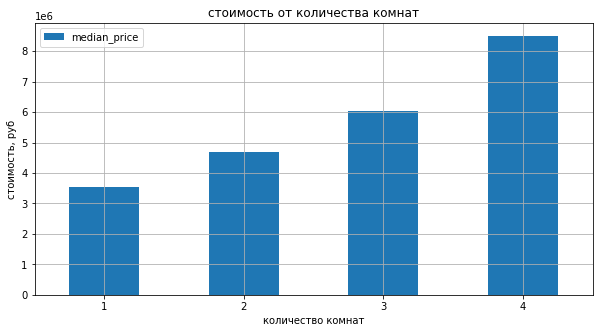

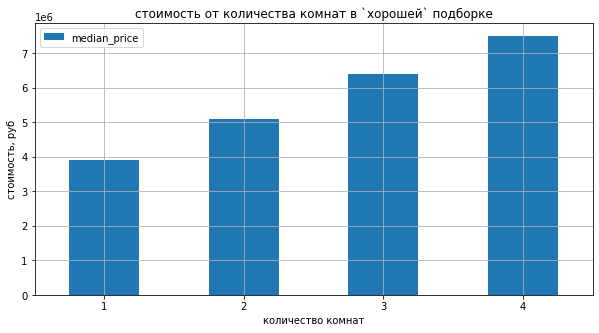

In [65]:
# по кол-ву комнат
filtred_rooms_data = filtred_data.query('1 <= rooms <= 4')

rooms_group = filtred_rooms_data.pivot_table(index='rooms', values='last_price', aggfunc=['median'])
rooms_group.columns = ['median_price']
rooms_group.plot(y='median_price', kind='bar', grid=True, figsize=(10, 5), title ='стоимость от количества комнат')
plt.xticks(rotation = 0)
plt.xlabel('количество комнат')
plt.ylabel('стоимость, руб')
plt.show()

good_selection_rooms = good_selection.pivot_table(index='rooms', values='last_price', aggfunc=['median'])
good_selection_rooms.columns = ['median_price']
good_selection_rooms.plot(y='median_price', kind='bar', grid=True, figsize=(10, 5),
                          title ='стоимость от количества комнат в `хорошей` подборке')
plt.xticks(rotation = 0)
plt.xlabel('количество комнат')
plt.ylabel('стоимость, руб')
plt.show()

В обоих случаях явный существенный рост медианной стоимости с увеличением количества комнат.

In [66]:
# Коэффициент корреляции Пирсона
print(filtred_rooms_data['rooms'].corr(filtred_rooms_data['last_price']))
print(good_selection['rooms'].corr(good_selection['last_price']))

0.5051691743918795
0.5152156980207978


Однако в целом по датасету (и по простому фильтру, и по "хорошей" выборке) коэффициент корреляции только 0,5-0,51.  
Т.е. количество комнат влияет, но не играет первостепенную и определяющую роль в росте стоимости квартиры, но остаётся достаточно важным.

### Тип этажа

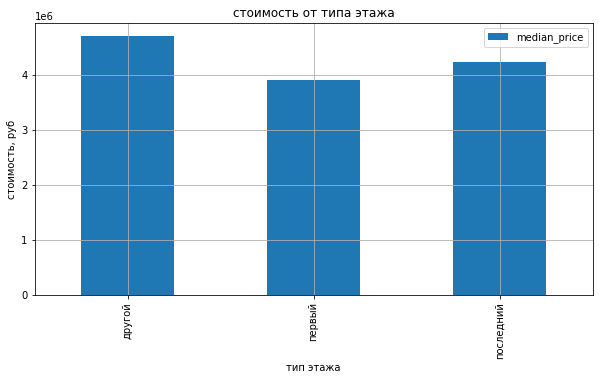

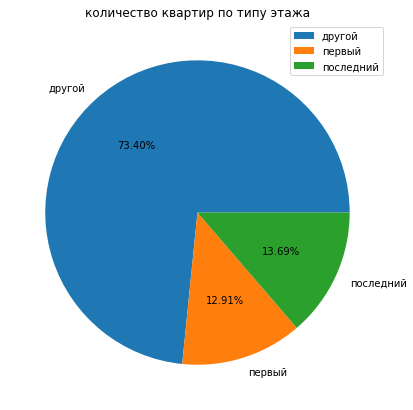

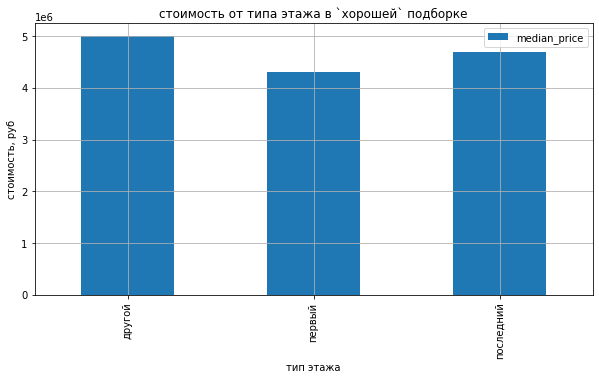

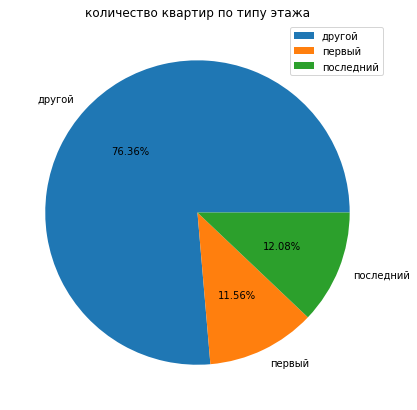

In [67]:
# Зависимость стоимости от типа этажа

filtred_floors_data = filtred_data.query('1 <= floor <= 17',  engine="python")

floors_group = filtred_floors_data.pivot_table(index='floor_type', values='last_price', aggfunc=['median','count'])
floors_group.columns = ['median_price', 'quantity']
floors_group.plot(y='median_price', kind='bar', grid=True, figsize=(10, 5), title ='стоимость от типа этажа')
plt.xlabel('тип этажа')
plt.ylabel('стоимость, руб')
plt.show()

floors_group.plot(kind='pie', y='quantity', figsize=(7, 7), autopct='%1.2f%%', title ='количество квартир по типу этажа')
plt.ylabel('')
plt.show()

good_selection_floors = good_selection.pivot_table(index='floor_type', values='last_price', aggfunc=['median', 'count'])
good_selection_floors.columns = ['median_price', 'quantity']
good_selection_floors.plot(y='median_price', kind='bar', grid=True, figsize=(10, 5),
                          title ='стоимость от типа этажа в `хорошей` подборке')
plt.xlabel('тип этажа')
plt.ylabel('стоимость, руб')
plt.show()

good_selection_floors.plot(kind='pie', y='quantity', figsize=(7, 7), autopct='%1.2f%%', title ='количество квартир по типу этажа')
plt.ylabel('')
plt.show()

В обоих подборках (в первом случае фильтр по этажам и цене за м2, во втором общая "хорошая" подборка) соотношение стоимости в зависимости от этажности примерно одинаковое - наибольшую медианную стоимость имеют квартиры, которые находятся не на первом и не на последнем этаже. Что в целом объяснимо, т.к. эта категория охватывает достаточно большое количество возможных вариантов расположения в плане этажности - эта группа самая большая по количеству объявлений по сравнению с остальными двумя группами (73,40% в первой подборке и 76,26% во второй)  
Также стоит отметить, что в обоих случаях не наблюдается какой-то кардинальной разницы в медианной стоимости между группами (разница есть, но очень большая)  
При этом в хорошей подборке медианные цены на квартиры в целом выше, чем простом фильтре.

In [68]:
# Коэффициент корреляции Пирсона (просто по номеру этажа)
print(filtred_floors_data['floor'].corr(filtred_floors_data['last_price']))
print(good_selection['floor'].corr(good_selection['last_price']))

0.06804633011830957
0.11861003301966237


Коэффициент корреляции в первой более широкой подборке - 0,068, во второй - 0,118.   
Т.е. влияние этажа на стоимость квартиры очень слабое или его вообще нет. 

### День недели

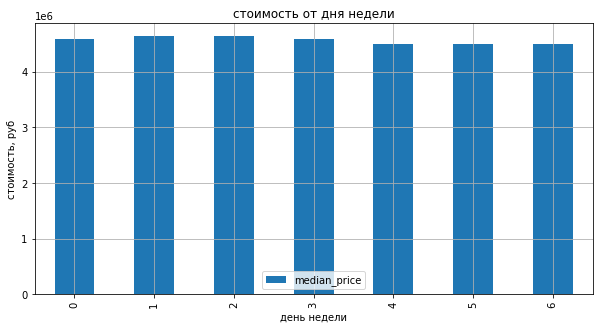

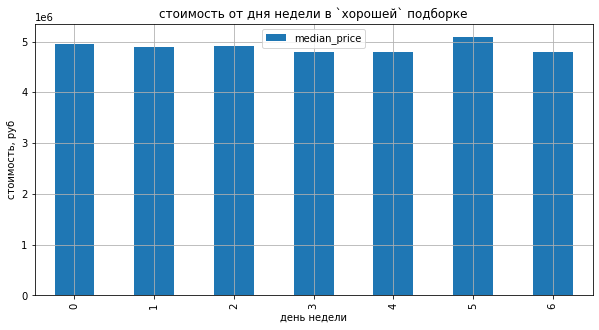

In [69]:
# день недели:

day_group = filtred_data.pivot_table(index='day_week', values='last_price', aggfunc=['median','count'])
day_group.columns = ['median_price', 'quantity']
day_group.plot(y='median_price', kind='bar', grid=True, figsize=(10, 5), title ='стоимость от дня недели')
plt.xlabel('день недели')
plt.ylabel('стоимость, руб')

good_selection_day = good_selection.pivot_table(index='day_week', values='last_price', aggfunc=['median', 'count'])
good_selection_day.columns = ['median_price', 'quantity']
good_selection_day.plot(y='median_price', kind='bar', grid=True, figsize=(10, 5),
                          title ='стоимость от дня недели в `хорошей` подборке')
plt.xlabel('день недели')
plt.ylabel('стоимость, руб')
plt.show()

В обоих выборках медианная стоимость квартир по каждому дню практически никак не меняется.  
В "хорошей" подборке медианная стоимость немного выше, чем в подборке с простым фильтром (примерно на 200-500т.р)

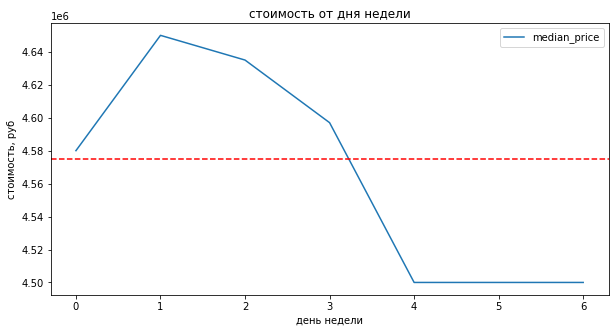

In [70]:
day_group.plot(y='median_price', figsize=(10, 5), title ='стоимость от дня недели')\
    .axhline(filtred_data['last_price'].median(), color = 'red', linestyle = 'dashed')
plt.xlabel('день недели')
plt.ylabel('стоимость, руб')
plt.show()

In [71]:
# Коэффициент корреляции Пирсона (просто по дню недели)
print(filtred_data['day_week'].corr(filtred_data['last_price']))
print(good_selection['day_week'].corr(good_selection['last_price']))

-0.01485140626120419
0.011655944437214585


Коэффициент корреляции только подтверждает отсутствие зависимости стоимости от дня недели в обоих подборках (в обоих случаях около нуля). 

### Месяц размещения

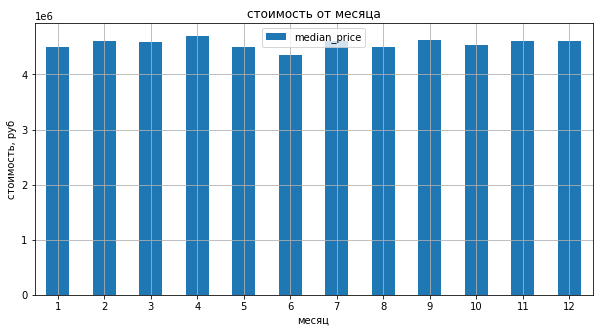

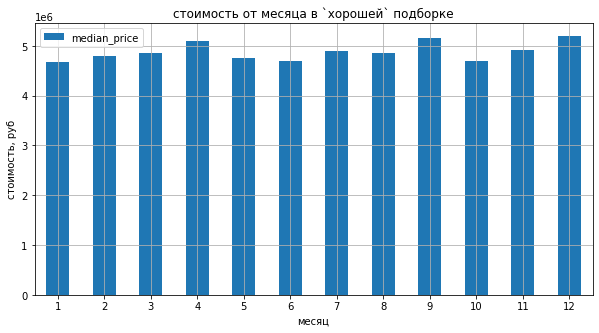

In [72]:
# месяц размещения
month_group = filtred_data.pivot_table(index='month', values='last_price', aggfunc=['median','count'])
month_group.columns = ['median_price', 'quantity']
month_group.plot(y='median_price', kind='bar', grid=True, figsize=(10, 5), title ='стоимость от месяца')
plt.xlabel('месяц')
plt.xticks(rotation=0)
plt.ylabel('стоимость, руб')
plt.show()

good_selection_month = good_selection.pivot_table(index='month', values='last_price', aggfunc=['median', 'count'])
good_selection_month.columns = ['median_price', 'quantity']
good_selection_month.plot(y='median_price', kind='bar', grid=True, figsize=(10, 5),
                          title ='стоимость от месяца в `хорошей` подборке')
plt.xlabel('месяц')
plt.xticks(rotation=0)
plt.ylabel('стоимость, руб')
plt.show()

По месяцам также в каждой подборке нет особой разницы в медианной стоимости квартир.  
Есть только незначительные колебания

In [73]:
# Коэффициент корреляции Пирсона (просто по месяцу размещения)
print(filtred_data['month'].corr(filtred_data['last_price']))
print(good_selection['month'].corr(good_selection['last_price']))

0.007671849601841168
0.015565894856292494


Коэффициент корреляции также стремится к 0 - зависимости стоимости от месяца размещения почти нет.

### По годам

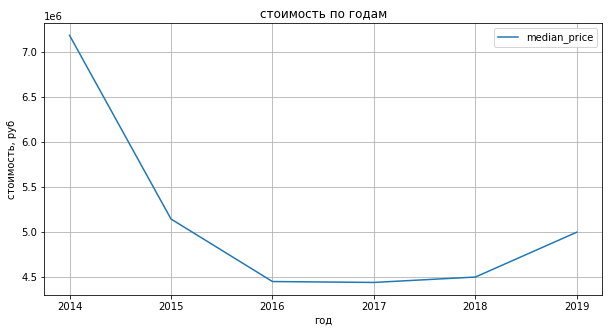

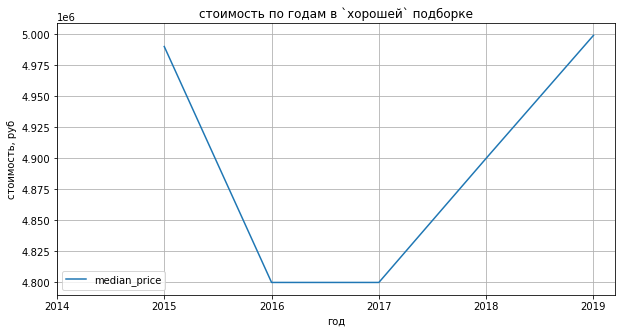

In [74]:
# по годам
year_group = filtred_data.pivot_table(index='year', values='last_price', aggfunc=['median','count'])
year_group.columns = ['median_price', 'quantity']
year_group.plot(y='median_price', kind='line', grid=True, figsize=(10, 5), title ='стоимость по годам')
plt.xlabel('год')
plt.ylabel('стоимость, руб')
plt.show()


good_selection_year = good_selection.pivot_table(index='year', values='last_price', aggfunc=['median', 'count'])
good_selection_year.columns = ['median_price', 'quantity']
good_selection_year.plot(y='median_price', kind='line', grid=True, figsize=(10, 5),
                          title ='стоимость по годам в `хорошей` подборке')
plt.xticks(ticks(2014, 2020))
plt.xlabel('год')
plt.ylabel('стоимость, руб')
plt.show()


По простому фильтру видно, что медианная стоимость снижалась до 2016года, до 2018 держалась на одном уровне, а далее начала немного расти.  
Другая картина по "хорошей" подборке - также до 2016 года снижение, но после 2017 года крутой рост (стоит обратить внимание)

In [75]:
# Коэффициент корреляции Пирсона (по месяцу размещения)
print(filtred_data['year'].corr(filtred_data['last_price']))
print(good_selection['year'].corr(good_selection['last_price']))

-0.03691186208910631
0.011854431127140982


Коэффициент корреляции около нуля в обоих случаях, что объясняется тем, что в разные периоды разные факторы сильнее влияют на цену.

### Топ-10 населённых пунктов по средней цене за квадратный метр

In [76]:
# Топ-10 населенных пунктов по средней цене квадратного метра.

locality_data = filtred_data.pivot_table(index='locality_name', values='price_m2', aggfunc=['mean', 'count']) 
locality_data.columns = ['mean_price', 'quantity']
locality_data = locality_data.sort_values(by='quantity', ascending=False)
top_10_locality = locality_data.head(10)
top_10_locality['mean_price'] = top_10_locality['mean_price'].apply(lambda x: round(x, 2))
display(top_10_locality)

good_locality = good_selection.pivot_table(index='locality_name', values='price_m2', aggfunc=['mean', 'count'])
good_locality.columns = ['mean_price', 'quantity']
good_locality = good_locality.sort_values(by='quantity', ascending=False)
good_locality['mean_price'] = good_locality['mean_price'].apply(lambda x: round(x, 2))
display(good_locality)

C:\Users\Marat\AppData\Local\Temp\ipykernel_4740\778668261.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_locality['mean_price'] = top_10_locality['mean_price'].apply(lambda x: round(x, 2))


,mean_price,quantity
locality_name,,
Санкт-Петербург,106632.05,14795
Мурино,86041.11,586
Кудрово,95261.99,469
Шушары,78551.36,439
Всеволожск,67275.63,396
Пушкин,102148.20,366
Колпино,75424.57,338
Парголово,90175.89,327
Гатчина,69294.57,304


,mean_price,quantity
locality_name,,
Санкт-Петербург,104376.89,3816
Пушкин,102643.39,36
Стрельна,87621.14,14
Парголово,80313.12,8


По основной выборке выходит, что наибольшее количество объявлений приходится на квартиры, которые находятся в Санкт-Петербурге (14795шт). Остальные 9 населенных пунктов из ТОП-10 суммарно даже близко не доходят до этого количества.  
К слову, в "хорошей" выборке вообще всего 4 населённых пункта. 

In [77]:
print('населённый пункт с самой высокой стоимостью квадратного метра')
display(locality_data.loc[locality_data['mean_price'] == locality_data['mean_price'].max()])

населённый пункт с самой высокой стоимостью квадратного метра


,mean_price,quantity
locality_name,,
Санкт-Петербург,106632.049003,14795


In [78]:
print('населённый пункт с самой низкой стоимостью квадратного метра')
display(locality_data.loc[locality_data['mean_price'] == locality_data['mean_price'].min()])

населённый пункт с самой низкой стоимостью квадратного метра


,mean_price,quantity
locality_name,,
Мануйлово,24477.0,1


### Квартиры Санкт-Петербурга и цена за км

Добавим дополнительный столбец с ценой за км.

In [79]:
# Квартиры Санкт-Петербурга и цена за км.
# Поскольку есть квартиры, которые располагаются очень близко к центру, то при формировании столбца "расстояние в км", то в этот столбец могли попасть нули.
# Чтобы избежать деления на ноль, эти значения обработаем чуть более длинным путём.
spb = filtred_data.query('181 <= cityCenters_nearest <= 27800 and locality_name == "Санкт-Петербург"').copy()
def price_km(row):
    if row['centers_nearest_km'] >= 1:
        price = row['last_price'] / row['centers_nearest_km']
    else:
        price = (row['last_price'] / (row['cityCenters_nearest'] / 1000))
    return round(price, 0)

spb['price_km'] = spb.apply(price_km, axis=1)

good_spb = good_selection.query('locality_name == "Санкт-Петербург"').copy()
good_spb['price_km'] = good_spb.apply(price_km, axis=1)


Построим графики зависимости цены от расстояния до центра

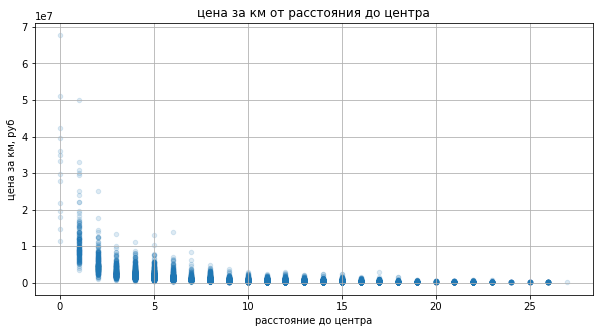

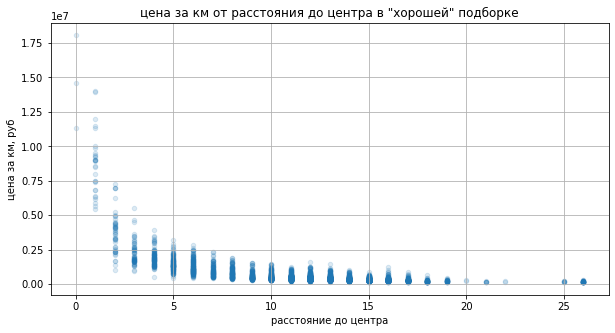

In [80]:
# график стоимость от расстояния в СПБ
spb.plot(x='centers_nearest_km', y='price_km', kind='scatter', grid=True, figsize=(10, 5), 
                    alpha=0.15, title ='цена за км от расстояния до центра')
plt.xlabel('расстояние до центра')
plt.ylabel('цена за км, руб')
plt.show()


good_spb.plot(x='centers_nearest_km', y='price_km', kind='scatter', grid=True, figsize=(10, 5), 
                    alpha=0.15, title ='цена за км от расстояния до центра в "хорошей" подборке')
plt.xlabel('расстояние до центра')
plt.ylabel('цена за км, руб')
plt.show()

Показательнее будет через сводные таблицы(сгруппировав по километражу и данными по медианной цене за километр) :

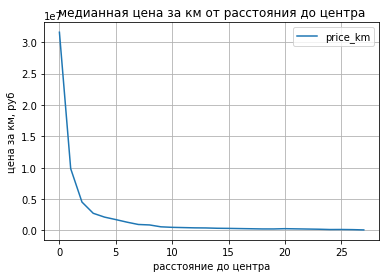

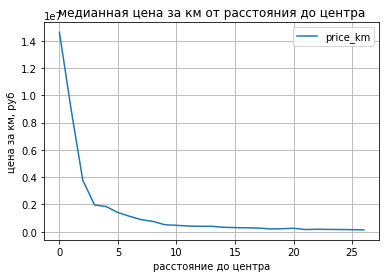

In [81]:
spb_km_group=spb.pivot_table(index='centers_nearest_km', values='price_km', aggfunc=['median'])
spb_km_group.columns = ['price_km']

spb_km_group.plot(y='price_km', kind='line', grid=True, title ='медианная цена за км от расстояния до центра')
plt.xlabel('расстояние до центра')
plt.ylabel('цена за км, руб')
plt.show()


good_spb_km_group=good_spb.pivot_table(index='centers_nearest_km', values='price_km', aggfunc=['median'])
good_spb_km_group.columns = ['price_km']
good_spb_km_group.plot(y='price_km', kind='line', grid=True, title ='медианная цена за км от расстояния до центра')
plt.xlabel('расстояние до центра')
plt.ylabel('цена за км, руб')
plt.show()

По графику чётко видно, что хоть и имеются отдельные отклонения, но в целом в Санкт-Петербурге имеется тенденция к снижению цены за км при увеличении расстояния от центра города (это видно в обоих подборках)

In [82]:
# Коэффициент корреляции Пирсона (по расстоянию до центра)
print(spb['price_km'].corr(spb['centers_nearest_km']))
print(good_spb['price_km'].corr(good_spb['centers_nearest_km']))

-0.513345284573304
-0.5926402254754108


По коэффициенту корреляции Пирсона в обоих случаях видно, что имеется обратная зависимость между ценой за км и расстоянием до центра города в СПб

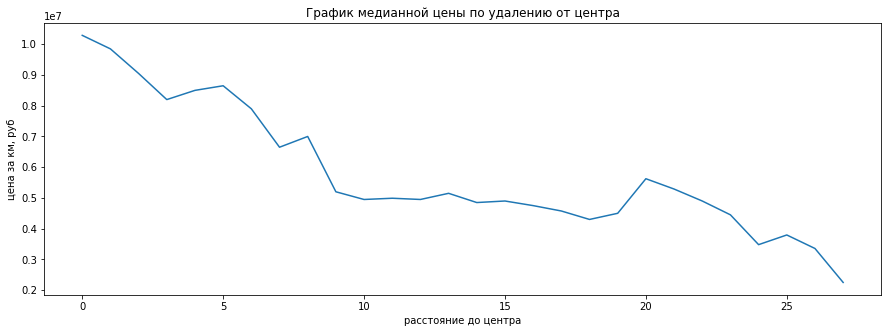

In [83]:
spb.groupby('centers_nearest_km')['last_price'].median()\
    .plot(figsize = (15,5), title = 'График медианной цены по удалению от центра');
plt.xlabel('расстояние до центра')
plt.ylabel('цена за км, руб')
plt.show()

## Общий вывод

При анализе исходного датасета можно сделать следующие выводы:
- Слишком много пропущенных значений. Особенно это касается расстояния до центра города, расстояния до аэропорта, количество парков и водоёмов. Таких значений много, а удалить их нельзя (они могли оказывать более существенное влияние на стоимость квартиры). Кроме того, часть пропусков пришлось заполнять по средним или медианным значениям - отчасти это оправдано, но реальные значения могут слишком сместить диапазоны для рассмотрения.
- имеются совсем уж аномальные значения. Например, квартиры с потолками до 2,2м и выше 6-7м. 
- у данных очень большой разброс: имеются квартирки с площадью до 12м2 (не ошибка ли?) и свыше 400м2 (элитное жильё или ошибка)
Аналогично есть квартиры с очень низкими или высокими потолками - ошибка? 
 
Основные "нормальные" диапазоны, которые можно видеть по диаграммам размаха:
- общая площадь от 12м2 до 120м2
- жилая площадь от 2м2 до 77м2
- площадь кухни от 3м2 до 22м2
- цена за метр кв. от 24т.р до 174 т.р
- количество комнат: 1-4
- высота потолков от 2,35м до 2,9м
- этаж квартиры - с 1-го по 17-й
- с общим количеством этажей - от 1 до 29
- расстояние до центра - 181м-26700м (много пропущенных значений в исходном датасете)
- расстояние до ближайшего аэропорта - 6200м-65200м (много пропущенных значений в исходном датасете)
- расстояние до ближайшего парка - 1м-1100м
- дни, которые "провисело" объявление - от 1-го до 510-и дней

Итого:
можно сказать, что ключевыми параметрами, которые влияют на цену являются:
- общая площадь - основной параметр (коэф Пирсона - 0,77-0,838)
- жилая площадь - также очень важный параметр (коэф Пирсона - 0,655-0,71)
- площадь кухни (коэф Пирсона - 0,564-0,618)
- количество комнат (коэф Пирсона - 0,5-0,51)
- расстояние до центра города в СПБ (коэф Пирсона - от -0,51 до -0,59)

Остальные влияют в меньшей степени.

Большая часть объявлений касается квартир, которые продаются в Санкт-Петербурге. Там же и самая высокая средняя цена за м2. Недалеко отстают по стоимости квадратного метра Пушкин, Кудрово и Парголово. 
Наименьшая цена за м2 - в Мануйлово.  
Также стоит отметить, что однозначно с удалением от центра Санкт-Петербурга стоимость квартир уменьшается.  

Но необходимо помнить, что изначальные данные имели много пропусков. Хоть большинство из них и были обработаны, всё же если бы пропусков было меньше, то можно было бы дать более точный итоговый результат.  
Например:
 - сделать обязательным заполнение жилой площади и кухонь при размещении объявлений (чтобы не было рисков искажения данных при заполнении пропусков с помощью средних или медианных расчётных величин).
 - сделать обязательным заполнение этажности зданий (хоть таких пропусков и совсем немного, их не обработать - приходится удалять)
 - лучше настроить автоматизированное заполнение данных в графах касающихся расстояний до центра города, аэропорта, ближайшего парка или водоёма, т.к. обработать эти пропуски самостоятельно невозможно, но пропусков много, а эти параметры в теории могли бы существенней влиять на стоимость недвижимости.